In [1]:
"""

Install pip dependencies 
"""
# !pip install --upgrade numpy==1.20.3 --user

# !pip install --upgrade theano --user
# import theano
# theano.config.optimizer = 'None'


'\n\nInstall pip dependencies \n'

# 1.Import Libraries

In [2]:
"""

Shap Libraries

"""

from plotnine import *


# import plotly.io as pio

from prophet import Prophet

from functools import partial
import optuna as opt

In [3]:
"""
Import required libraries

"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV,cross_val_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn import linear_model
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score,precision_score,recall_score
from sklearn.metrics import mean_absolute_percentage_error,r2_score,mean_squared_error
from sklearn.metrics import RocCurveDisplay,roc_curve,auc
from xgboost import XGBClassifier,XGBRegressor
from sklearn.svm import SVR
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import RepeatedKFold
import time
from sklearn.impute import KNNImputer
from sklearn.naive_bayes import GaussianNB

from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
from sklearn.datasets import make_classification
import re

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils import check_array
from sklearn.utils.validation import check_is_fitted

import shap
from pprint import pprint

# For ordinal encoding categorical variables, splitting data
from tqdm import tqdm

#Import 'scope' from hyperopt in order to obtain int values for certain hyperparameters.
from hyperopt.pyll.base import scope
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
import warnings

from scipy import optimize
np.random.seed(42)

from IPython.display import display, HTML
display(HTML("<st yle>.container { width:80% !important; }</style>"))

pd.set_option('display.max_rows', 300)
pd.set_option('display.max_columns', 300)

import warnings
warnings.filterwarnings('ignore')

# 2.Define Functions

In [4]:
class data_pre_processing():
    """
    Pre process pandas dataframes
    """
    
    def df_description(df):
        print('shape : ',df.shape)
        print('dtypes :','\n',df.dtypes)
        return None

    def convert_col_names_to_lower_case(df):
        for col in df.columns:
            df = df.rename(columns = {col:col.lower()})
        return df
    
    def describe_data(df):
        display(df.describe(include='all'))
        return None
    
    def data_info(df):
        display(df.info(verbose=True, show_counts=True))
        return None

    def nulls_in_data(df):
        print(df.isnull().sum())
        return None
    
    def duplicate_rows_at_primary_key_level(df,level_of_the_data :list):
        
        df = df[df.duplicated(subset=level_of_the_data, keep=False)]
        if df.shape[0] >0:
            print(" Dataframe has duplicates, total rows with duplicates :",df.shape[0])
        else:
            print(" No duplicates in data")      
        return df
    
    def percentage_nulls_in_each_col(df):
        """
        Return a DF of total null percentage in each column
        Args:
            df (Dataframe): Input DF
        """
        NA = pd.DataFrame(data=[df.isna().sum().tolist(), ["{:.2f}".format(i)+'%' \
           for i in (df.isna().sum()/df.shape[0]*100).tolist()],df.dtypes.tolist()], 
           columns=df.columns, index=['NA Count', 'NA Percent','Dtypes']).transpose()
        display(NA)
        
        return None

        
            
    def drop_cols(df,column_list_to_drop):
        """

        Args:
            df (Dataframe): Input Dataframe
            column_list_to_drop (List of Columns): List of columns to be dropped from DF
            
        Result :
            df with updated columns post dropping.
        """
        
        return df.drop(columns = column_list_to_drop)
    
    def df_columns_and_dtypes_into_list(df) -> dict:
        """

        Returns Dataframe columns and respcetive dtypes as a dictionary.
        Args:
            df (Dataframe): Input Dataframe

        Returns:
            dict: {col1:dtype,col2:dtype2}
        """
        
        return {df.columns.tolist()[i] : str(df.dtypes.tolist()[i]) for i in range(len(df.columns)) }
    
    
    def convert_dtypes_from_dict(df, col_to_dtype_mapping_dict : dict ):
        """
        df : Input Dataframe
        col_to_dtype_mapping_dict: {column:dtype}
        
        return : df with updated dtypes
        
        """
        print('Converting Column Datatypes')
        for col,dtype in col_to_dtype_mapping_dict.items():
            try:
                if col in df.columns:
                    if dtype == 'string':
                        df[col] = df[col].astype(str)
                    elif dtype == 'int':
                        df[col] = df[col].astype(int)
                    elif dtype == 'float':
                        df[col] = df[col].astype(float)
                    elif dtype == 'datetime':
                        df[col] = pd.to_datetime(df[col])
            except Exception as e:
                print('Error processing : ',col, ' ; ',e)
        return df
    


    def ydata_profiling(df):
        """
        Run ydata_profile library for data
        Args:
            df (Dataframe): Df to be profiled

        Returns:
            _type_: _description_
        """
        # !pip install ydata-profiling --ignore-installed llvmlite --user
        # from ydata_profiling import ProfileReport
        # or
        # !pip install ydata-profiling==4.1.2
        # !pip install pydantic==2.6.0 --user
        from ydata_profiling import ProfileReport
        profile = ProfileReport(df)
        
        return profile
    


    def process_nulls_in_df(df,null_columns)-> pd.core.frame.DataFrame:
        """_summary_

        Args:
            df (_type_): _description_
            null_columns (_type_): _description_

        Returns:
            pd.core.frame.DataFrame: _description_
        """
    

        
        return None
    
def plot_line_charts_with_lags(df, x_variable, y_variable='sales'):
    """
    Creates a 1x3 matrix of line charts with the specified x variable and sales over time,
    including charts with 1-week and 2-week lags for the x variable, all scaled based on Z-scores.

    Args:
    - df (DataFrame): The dataset containing the variables.
    - x_variable (str): The name of the x variable to plot against time.
    - y_variable (str): The name of the y variable, default is 'sales'.
    """

    # Ensuring the date column is in datetime format
    df['week_start_date'] = pd.to_datetime(df['week_start_date'])

    # Creating lagged variables
    df[f'{x_variable}_lag1'] = df[x_variable].shift(-1)
    df[f'{x_variable}_lag2'] = df[x_variable].shift(-2)

    # Scaling the variables based on Z-scores
    scaler = StandardScaler()
    scaled_vars = scaler.fit_transform(df[[y_variable, x_variable, f'{x_variable}_lag1', f'{x_variable}_lag2']].dropna())
    df_scaled = pd.DataFrame(scaled_vars, columns=[y_variable, x_variable, f'{x_variable}_lag1', f'{x_variable}_lag2'])

    # Setting up the figure for plotting
    fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

    # Because scaling and shifting may lead to a different number of rows, we need to align the date index.
    dates = df['week_start_date'][-len(df_scaled):]

    # Original variable line chart
    axes[0].plot(dates, df_scaled[y_variable], label=y_variable, color='blue')
    axes[0].plot(dates, df_scaled[x_variable], label=x_variable, color='red')
    axes[0].set_title(f'Original {y_variable} and {x_variable} (Scaled)')
    axes[0].legend(loc='upper left')

    # 1-week lag line chart
    axes[1].plot(dates, df_scaled[y_variable], label=y_variable, color='blue')
    axes[1].plot(dates, df_scaled[f'{x_variable}_lag1'], label=f'{x_variable} (1-week lag)', color='red')
    axes[1].set_title(f'{y_variable} and 1-week Lag of {x_variable} (Scaled)')
    axes[1].legend(loc='upper left')

    # 2-week lag line chart
    axes[2].plot(dates, df_scaled[y_variable], label=y_variable, color='blue')
    axes[2].plot(dates, df_scaled[f'{x_variable}_lag2'], label=f'{x_variable} (2-week lag)', color='red')
    axes[2].set_title(f'{y_variable} and 2-week Lag of {x_variable} (Scaled)')
    axes[2].legend(loc='upper left')

    
    for ax in axes:
        ax.set_xlabel('Date')
        ax.set_ylabel('Scaled Value')
        ax.tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

# 3.Pre-process Data

In [5]:
"""
Read the dataset.

Four years' (209 weeks) records of sales, media impression and media spending at weekly level.

1. Media Variables

Media Impression (prefix='mdip_'): impressions of 13 media channels: direct mail, insert, newspaper, digital audio, radio, TV, digital video, social media, online display, email, SMS, affiliates, SEM.
Media Spending (prefix='mdsp_'): spending of media channels.
2. Control Variables

Macro Economy (prefix='me_'): CPI, gas price.
Markdown (prefix='mrkdn_'): markdown/discount.
Store Count ('st_ct')
Retail Holidays (prefix='hldy_'): one-hot encoded.
Seasonality (prefix='seas_'): month, with Nov and Dec further broken into to weeks. One-hot encoded.
3. Sales Variable ('sales')

"""
    



mmm_df = pd.read_csv('MMM_Data.csv')
print(mmm_df.shape)



(209, 80)


In [6]:
"""
Define new names for columns.
Re-map column names.

"""

mmm_df2 = mmm_df.copy()

mapped_columns_dict = {'mdip_':'media_impression_',\
                        'mdsp_':'media_spend_',\
                        'me_': 'macro_econ_',\
                        'mrkdn_':'markdown_discount_',\
                        'st_ct':'store_count',\
                        'wk_strt_dt':'week_start_date',\
                        'wk_in_yr_nbr':'week_in_year',\
                        'yr_nbr':'year',\
                        'qtr_nbr':'quarter',\
                        'prd':'period',\
                        'wk_nbr':'week_in_month',\
                        '_dm':'_direct_mail',\
                        '_inst':'_insert',\
                        '_nsp':'_newspaper',\
                        '_auddig':'_dig_audio',\
                        '_audtr':'_radio',\
                        '_vidtr':'_tv',\
                        '_viddig':'_dig_video',\
                        '_so':'_social_media',\
                        '_on':'_online display',\
                        '_em':'_email',\
                        '_sms':'_sms',\
                        }

datatype_mapping = {'week_start_date':'datetime'}

# Map column names
for short_form,long_form in mapped_columns_dict.items():
    for col in mmm_df2.columns:
        if short_form in col:
            new_col_name = re.sub(short_form,long_form,col)
            # print(short_form,"--> ",col,"--> ",new_col_name)
            mmm_df2 = mmm_df2.rename(columns={col:new_col_name})


# Lowercase column names
mmm_df2 = data_pre_processing.convert_col_names_to_lower_case(mmm_df2)

# String to Date conversion
mmm_df2 = data_pre_processing.convert_dtypes_from_dict(df = mmm_df2,col_to_dtype_mapping_dict=datatype_mapping)





Converting Column Datatypes


In [7]:
"""
Define continuous,categorical and target column

"""


continuous_column = [ 'media_impression_direct_mail', 'media_impression_insert',
       'media_impression_newspaper', 'media_impression_dig_audio',
       'media_impression_radio', 'media_impression_tv',
       'media_impression_dig_video', 'media_impression_social_media',
       'media_impression_online display', 'media_impression_email',
       'media_impression_sms', 'media_impression_aff', 'media_impression_sem',
       'media_spend_direct_mail', 'media_spend_insert',
       'media_spend_newspaper', 'media_spend_dig_audio', 'media_spend_radio',
       'media_spend_tv', 'media_spend_dig_video', 'media_spend_social_media',
       'media_spend_online display', 'media_spend_sem',
       'macro_econ_ics_all', 'macro_econ_gas_dpg', 'store_count',
       'markdown_discount_valadd_edw', 'markdown_discount_pdm']

one_hot_encoded_columns = ["hldy_black friday",
       "hldy_christmas day", "hldy_christmas eve", "hldy_columbus day",
       "hldy_cyber monday", "hldy_day after christmas", "hldy_easter",
       "hldy_father's day", "hldy_green monday", "hldy_july 4th",
       "hldy_labor day", "hldy_mlk", "hldy_memorial day", "hldy_mother's day",
       "hldy_nye", "hldy_new year's day", "hldy_pre thanksgiving",
       "hldy_presidents day", "hldy_prime day", "hldy_thanksgiving",
       "hldy_valentine's day", "hldy_veterans day",
       #  "seas_period_1",
       # "seas_period_2", "seas_period_3", "seas_period_4", "seas_period_5",
       # "seas_period_6", "seas_period_7", "seas_period_8", "seas_period_9",
       # "seas_period_12", "seas_week_40", "seas_week_41", "seas_week_42",
       # "seas_week_43", "seas_week_44", "seas_week_45", "seas_week_46",
       # "seas_week_47", "seas_week_48"
       ]

date_columns = ['week_start_date', 'year', 'quarter', 'period', 'week_in_month','week_in_year']

target_column = ["sales"]

""""

Lightweight mmm columns

"""

media_spend_cols = [ 'media_spend_direct_mail', 'media_spend_insert',
       'media_spend_newspaper', 'media_spend_dig_audio', 'media_spend_radio',
       'media_spend_tv', 'media_spend_dig_video', 'media_spend_social_media',
       'media_spend_online display', 'media_spend_sem']


media_impression_cols = [ 'media_impression_direct_mail', 'media_impression_insert',
       'media_impression_newspaper', 'media_impression_dig_audio',
       'media_impression_radio', 'media_impression_tv',
       'media_impression_dig_video', 'media_impression_social_media',
       'media_impression_online display', 'media_impression_sem']


extra_features_cols = ['macro_econ_ics_all', 'macro_econ_gas_dpg', 'store_count',
       'markdown_discount_valadd_edw', 'markdown_discount_pdm']+one_hot_encoded_columns

## Train-Test-Split

Note: We do not end up using this step in our analysis. We use time-series split instead. However, the "mmm_df2_time_series" dataframe is refrenced in future cells.

In [8]:
"""
Train test split

"""


"""

Time-series Split -->

"""
tss = TimeSeriesSplit(n_splits = 4)

mmm_df2_time_series = mmm_df2.copy()
mmm_df2_time_series.set_index('week_start_date', inplace=True)
mmm_df2_time_series.sort_index(inplace=True)

independant_columns = [i for i in continuous_column+one_hot_encoded_columns+date_columns if 'week_start_date' not in i]

X = mmm_df2_time_series[independant_columns]
y = mmm_df2_time_series[target_column]

# Add 0.01 to each numerical value for lightweight mmm
for col in X.columns:
    if col in continuous_column:
        X[col] = X[col] + 0.1

for train_index, test_index in tss.split(X):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index,:]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]


print(X_train.shape,X_test.shape)



"""

Regular Split -->

"""

# independant_columns = [i for i in continuous_column+one_hot_encoded_columns+date_columns if 'week_start_date' not in i ]
# X = mmm_df2[independant_columns]
# y = mmm_df2[target_column]

# # Using the train test split function
# X_train, X_test, y_train, y_test = train_test_split(
#   X,y , random_state=104,test_size=0.25, shuffle=True)

# print(X_train.shape,X_test.shape)

(168, 55) (41, 55)


'\n\nRegular Split -->\n\n'

## 4. Define AdStock Decay,Shapley and Model Functions:

1) Adstock Decay: This function is used to apply adstock decay to the media spend.

2) Model Refit: Apply best hyperparameters to model.

3) Effect Share related functions: Uses Shapley to calculate marginal effects on target variable.

In [9]:
class AdstockGeometric(BaseEstimator, TransformerMixin):

    """
    AdstockGeometric is a class that implements the Adstock Geometric model for media spend analysis.
    
    The Adstock Geometric model is used to estimate the impact of media spend on a target variable. It takes into account
    the decay of media spend over time using a geometric decay function.

    TransformerMixin: Allows for fit_transform() method.

    BaseEstimator: Allows for set_params() and get_params() methods.

    x_decayed[xi] = X[xi] + self.alpha* x_decayed[xi - 1]: Applies adstock decay- "alpha" to each spend.

    """
    def __init__(self, alpha=0.5):
        self.alpha = alpha
        
    def fit(self, X, y=None):
        X = check_array(X)
        self._check_n_features(X, reset=True)
        return self
    
    def transform(self, X: np.ndarray):
        check_is_fitted(self)
        X = check_array(X)
        self._check_n_features(X, reset=False)
        x_decayed = np.zeros_like(X)
        x_decayed[0] = X[0]
        
        for xi in range(1, len(x_decayed)):
            x_decayed[xi] = X[xi] + self.alpha* x_decayed[xi - 1]
        return x_decayed
    
def nrmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2)) / (np.max(y_true) - np.min(y_true))

#https://github.com/facebookexperimental/Robyn
def rssd(effect_share, spend_share):
    """
    RSSD decomposition
    
    Decomposition distance (root-sum-square distance, a major innovation of Robyn) 
    eliminates the majority of "bad models" 
    (larger prediction error and/or unrealistic media effect like the smallest channel getting the most effect

        effect_share : percentage of effect share - Calculated using Shapley.
        spend_share : percentage of spend share - Calculated using media spends.

    """
    return np.sqrt(np.sum((effect_share - spend_share) ** 2))



def shap_feature_importance(shap_values, data, figsize = (20, 10)):
    
    """
    
    Plot Shapley Featire Importance:
    Green colour indicates- as spend increases, shap value also increases.
    Red colour indicates- as spend increases, shap value decreases.


    """
    feature_list = data.columns
    
    if isinstance(shap_values, pd.DataFrame) == False:
        shap_v = pd.DataFrame(shap_values)
        shap_v.columns = feature_list
    else:
        shap_v = shap_values
    

        
    df_v = data.copy().reset_index().drop('index',axis=1)
    
    # Determine the correlation in order to plot with different colors
    corr_list = list()
    for i in feature_list:
        b = np.corrcoef(shap_v[i],df_v[i])[1][0]
        corr_list.append(b)
    corr_df = pd.concat([pd.Series(feature_list),pd.Series(corr_list)],axis=1).fillna(0)
    # # Make a data frame. Column 1 is the feature, and Column 2 is the correlation coefficient
    corr_df.columns  = ['Variable','Corr']
    corr_df['Sign'] = np.where(corr_df['Corr']>0,'green','red')
    
    # # Plot it
    shap_abs = np.abs(shap_v)
    k=pd.DataFrame(shap_abs.mean()).reset_index()
    k.columns = ['Variable','SHAP_abs']
    k2 = k.merge(corr_df,left_on = 'Variable',right_on='Variable',how='inner')
    k2 = k2.sort_values(by='SHAP_abs',ascending = True)
    colorlist = k2['Sign']
    ax = k2.plot.barh(x='Variable',y='SHAP_abs',color = colorlist, figsize=figsize,legend=False)
    ax.set_xlabel("SHAP Value (Red = Positive Impact)")
    
def model_refit(data, 
                target, 
                features, 
                media_channels, 
                organic_channels, 
                model_params, 
                adstock_params,
                start_index, 
                model_name,
                end_index):

    """
     Refit the model using the specified data and parameters.
    
    This function takes the input data, target variable, features, media channels, organic channels, model parameters,
    adstock parameters, start index, and end index. It then refits the model using the provided data and parameters.
    
    """
   
    data_refit = data.copy()

    best_params = model_params

    adstock_alphas = adstock_params

    #apply adstock transformation
    for feature in media_channels + organic_channels:
        adstock_alpha = adstock_alphas[feature]
        print(f"applying geometric adstock transformation on {feature} with alpha {adstock_alpha}") 

        #adstock transformation
        x_feature = data_refit[feature].values.reshape(-1, 1)
        temp_adstock = AdstockGeometric(alpha = adstock_alpha).fit_transform(x_feature)
        data_refit[feature] = temp_adstock

    #build the final model on the data until the end analysis index
    tss = TimeSeriesSplit(n_splits = 2, test_size=50)
    X = data_refit[features]
    y = data_refit[target]

    for train_index, test_index in tss.split(X):
        x_input, x_input_interval_transformed = X.iloc[train_index, :], X.iloc[test_index,:]
        y_true_all, y_true_interval = y.iloc[train_index], y.iloc[test_index]

    y_true_interval = y_true_interval.to_numpy() # converted so that it can be plotted later,

    print(f"x_input.shape, x_input_interval_transformed.shape, y_true_all.shape, y_true_interval.shape ==> {x_input.shape},{x_input_interval_transformed.shape},{y_true_all.shape},{y_true_interval.shape}")
    # x_input = data_refit.loc[0:end_index-1, features]
    # y_true_all = data[target].values[0:end_index]

    #build random forest using the best parameters

    monotonic_constraints = {i:1 if 'spend' in i else 0 for i in x_input.columns}
    print(f"monotonic_constraints: {monotonic_constraints}")

    if model_name == "Random Forest":
        rf = RandomForestRegressor(random_state=0, **best_params)

    elif model_name =="XGBoost":
        rf = XGBRegressor( **best_params,monotone_constraints = monotonic_constraints)


    # random_forest = RandomForestRegressor(random_state=0, **best_params)
    rf.fit(x_input, y_true_all) 


    #concentrate on the analysis interval
    # y_true_interval = y_true_all[start_index:end_index]    
    # x_input_interval_transformed = x_input.iloc[start_index:end_index]

    # print(f"x_input.shape, x_input_interval_transformed.shape, y_true_all.shape, y_true_interval.shape ==> {x_input.shape},{x_input_interval_transformed.shape},{y_true_all.shape},{y_true_interval.shape}")

    #revenue prediction for the analysis interval
    print(f"predicting {len(x_input_interval_transformed)}")
    print(f"y_true_interval: {type(y_true_interval)}")

    prediction = rf.predict(x_input_interval_transformed)
    # print(x_input_interval_transformed)

    print(f" mape: {mean_absolute_percentage_error(y_true = y_true_interval, y_pred = prediction)}")
    #transformed data set for the analysis interval 
    x_input_interval_nontransformed = data.iloc[test_index,:]
    
    # x_input_interval_nontransformed = data.iloc[start_index:end_index]


    #shap explainer 
    explainer = shap.TreeExplainer(rf)

    # get SHAP values for the data set for the analysis interval from explainer model
    shap_values_train = explainer.shap_values(x_input_interval_transformed)

    # create a dataframe of the shap values for the training set and the test set
    df_shap_values = pd.DataFrame(shap_values_train, columns=features)
    
    return {
            'model': rf,
            'model_features' : features,
            'df_shap_values': df_shap_values, 
            'x_input_interval_nontransformed': x_input_interval_nontransformed, 
            'x_input_interval_transformed' : x_input_interval_transformed,
            'prediction_interval': prediction, 
            'y_true_interval': y_true_interval
           }
    
def calculate_spend_effect_share(df_shap_values: pd.DataFrame, media_channels, df_original: pd.DataFrame):
    """
    Args:
        df_shap_values: data frame of shap values
        media_channels: list of media channel names
        df_original: non transformed original data
    Returns: 
        [pd.DataFrame]: data frame with spend effect shares
    """
    responses = pd.DataFrame(df_shap_values[media_channels].abs().sum(axis = 0), columns = ["effect_share"])
    response_percentages = responses / responses.sum()
    response_percentages

    spends_percentages = pd.DataFrame(df_original[media_channels].sum(axis = 0) / df_original[media_channels].sum(axis = 0).sum(), columns = ["spend_share"])
    spends_percentages

    spend_effect_share = pd.merge(response_percentages, spends_percentages, left_index = True, right_index = True)
    spend_effect_share = spend_effect_share.reset_index().rename(columns = {"index": "media"})
    
    return spend_effect_share

## 5. Hyperparameter tuning using Optuna

### Define Optuna Hyperparameter tuning trial object

In [10]:
"""

Optuna Trial function returns the accuracy of every model run. It is plugged into the "optuna_optimize" function, which inuts different hyperparameters each run and minimises loss.

"""


def optuna_trial(trial, 
                 data:pd.DataFrame, 
                 target, 
                 features, 
                 adstock_features, 
                 adstock_features_params, 
                 media_features, 
                 model_name,
                 tscv, 
                 is_multiobjective = False):

    """
    
    Perform an Optuna trial using the specified data and parameters. This is the function whose output we will minimize.
    
    This function takes the Optuna trial object, input data, target variable, features, media channels, organic channels,
    model parameters, and adstock parameters. It then performs the Optuna trial using the provided data and parameters.
    
    Parameters
    ----------
    trial : optuna.trial.Trial
        The Optuna trial object.
        
    data : The input data for the trial.
        
    target : str
        The name of the target variable.
        
    features : The list of features to include in the trial.
        
    media_channels : The list of media channels to consider.
        
    adstock_features_params : The parameters for the Adstock model.
        
    Returns:  RMSE - this is what we want to minimize
    """


    data_temp = data.copy()
    adstock_alphas = {}
    # print("*********** New Trial ***********")
    # Apply adstock transformation
    for feature in adstock_features:
        adstock_param = f"{feature}_adstock"
        min_, max_ = adstock_features_params[adstock_param]
        adstock_alpha = trial.suggest_uniform(f"adstock_alpha_{feature}", min_, max_)
        # print(feature,"*************************************",adstock_alpha)
        adstock_alphas[feature] = adstock_alpha
        # print(feature,adstock_alphas)
        
        #adstock transformation
        x_feature = data[feature].values.reshape(-1, 1)
        temp_adstock = AdstockGeometric(alpha = adstock_alpha).fit_transform(x_feature)
        data_temp[feature] = temp_adstock
        
    
    #Decide model
    if model_name == "Random Forest":
        #Random Forest parameters
        n_estimators = trial.suggest_int("n_estimators", 5, 100)
        min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 20)
        min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
        max_depth = trial.suggest_int("max_depth", 4,7)
        ccp_alpha = trial.suggest_uniform("ccp_alpha", 0, 0.3)
        bootstrap = trial.suggest_categorical("bootstrap", [False, True])
        criterion = trial.suggest_categorical("criterion", ["squared_error"])  #"absolute_error"
    
    elif model_name == "XGBoost":

        reg_lambda = trial.suggest_loguniform('reg_lambda', 7.0, 17.0)
        reg_alpha = trial.suggest_loguniform('reg_alpha', 7.0, 17.0)
        eta = trial.suggest_float('eta', 0.3, 1.0)
        gamma = trial.suggest_float('gamma', 18, 25)
        learning_rate = trial.suggest_float('learning_rate', 0.008, 0.02)
        colsample_bytree = trial.suggest_float('colsample_bytree', 0.3, 1.0)
        colsample_bynode = trial.suggest_categorical('colsample_bynode', [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
        n_estimators = trial.suggest_int('n_estimators', 400, 1000)
        min_child_weight = trial.suggest_int('min_child_weight', 8, 600)
        max_depth = trial.suggest_categorical('max_depth', [3, 4, 5, 6, 7])
        subsample = trial.suggest_float('subsample', 0.3, 1.0)

    
    scores = []
    
    rssds = []


    tr = 1
    for train_index, test_index in tscv.split(data_temp):
    
        x_train = data_temp.iloc[train_index][features]
        y_train =  data_temp[target].values[train_index]
        
        x_test = data_temp.iloc[test_index][features]
        y_test = data_temp[target].values[test_index]
        
        if model_name == "Random Forest":
            #apply Random Forest
            params = {"n_estimators": n_estimators, 
                    "min_samples_leaf":min_samples_leaf, 
                    "min_samples_split" : min_samples_split,
                    "max_depth" : max_depth, 
                    "ccp_alpha" : ccp_alpha, 
                    "bootstrap" : bootstrap, 
                    "criterion" : criterion
                    }
        elif model_name == "XGBoost":
            params = {
                "eta": eta,
                    "gamma": gamma,
                    "max_depth":max_depth,
                    # "min_child_weight":min_child_weight,
                    "subsample":subsample,
                    "colsample_bytree":colsample_bytree,
                    "reg_lambda":reg_lambda,
                    "reg_alpha":reg_alpha,
                    # "learning_rate":learning_rate,
                    # "n_estimators":n_estimators

                    }

        
        monotonic_constraints = {i:1 if 'spend' in i else 0 for i in x_train.columns}
        # print(f"monotonic_constraints: {monotonic_constraints}")

        if model_name == "Random Forest":
            rf = RandomForestRegressor(random_state=0, **params)

        elif model_name =="XGBoost":
            rf = XGBRegressor(random_state=0, **params,monotone_constraints = monotonic_constraints)


        rf.fit(x_train, y_train)
        prediction = rf.predict(x_test)
        
        rmse = mean_squared_error(y_true = y_test, y_pred = prediction, squared = False)
        mape = mean_absolute_percentage_error(y_true = y_test, y_pred = prediction)
        
        
        tr = tr+1

        scores.append(rmse)

        # print(scores)
        
        if is_multiobjective:
            
            #set_trace()
            #calculate spend effect share -> rssd
            # create explainer model by passing trained model to shap
            explainer = shap.TreeExplainer(rf)

            # get Shap values
            shap_values_train = explainer.shap_values(x_train)
            
            df_shap_values = pd.DataFrame(shap_values_train, columns=features)

            spend_effect_share = calculate_spend_effect_share(df_shap_values = df_shap_values, media_channels = media_features, df_original = data.iloc[train_index])

            decomp_rssd = rssd(effect_share = spend_effect_share.effect_share.values, spend_share = spend_effect_share.spend_share.values)
            rssds.append(decomp_rssd)

    
    
    trial.set_user_attr("scores", scores)
    
    trial.set_user_attr("params", params)
    trial.set_user_attr("adstock_alphas", adstock_alphas)
    
    if is_multiobjective == False:
        return np.mean(scores)
    
    print(f" trial: {tr},  len train_index: {len(train_index)}, len test_index: {len(test_index)}, rmse: {rmse}, mape: {mape}")
    
    trial.set_user_attr("rssds", rssds)
        
    #multiobjective
    return np.mean(scores), np.mean(rssds)

In [11]:
def optuna_optimize(trials, 
                    data: pd.DataFrame, 
                    target, 
                    features, 
                    adstock_features, 
                    adstock_features_params, 
                    media_features, 
                    model_name,
                    tscv, 
                    is_multiobjective, 
                    seed = 42):

    """
    Optuna optimization function: Runs the "optuna_trial" function for each trial.
    
    """
    print(f"data size: {len(data)}")
    print(f"media features: {media_features}")
    print(f"adstock features: {adstock_features}")
    print(f"features: {features}")
    print(f"model_name: {model_name}")
    print(f"is_multiobjective: {is_multiobjective}")
    opt.logging.set_verbosity(opt.logging.WARNING) 
    
    if is_multiobjective == False:
        study_mmm = opt.create_study(direction='minimize', sampler = opt.samplers.TPESampler(seed=seed))  
    else:
        study_mmm = opt.create_study(directions=["minimize", "minimize"], sampler=opt.samplers.NSGAIISampler(seed=seed))
        
    optimization_function = partial(optuna_trial, 
                                    data = data, 
                                    target = target, 
                                    features = features, 
                                    adstock_features = adstock_features, 
                                    adstock_features_params = adstock_features_params, 
                                    media_features = media_features, 
                                    model_name = model_name,
                                    tscv = tscv, 
                                    is_multiobjective = is_multiobjective)
    
    
    study_mmm.optimize(optimization_function, n_trials = trials, show_progress_bar = True)
    
    return study_mmm
    

### Run Optuna

In [12]:
"""
Run Optuna Hypeparameter tuning.

"""

tscv = TimeSeriesSplit(n_splits=4, test_size = 30)

model_name = "XGBoost"

adstock_features_params = {}
adstock_features_params["media_spend_direct_mail_adstock"] = (0.1,1)
adstock_features_params["media_spend_insert_adstock"] = (0.1,1)
adstock_features_params["media_spend_newspaper_adstock"] = (0.1,1)
adstock_features_params["media_spend_dig_audio_adstock"] = (0.1,1)
adstock_features_params["media_spend_radio_adstock"] = (0.1,1)
adstock_features_params["media_spend_tv_adstock"] = (0.1,1)
adstock_features_params["media_spend_dig_video_adstock"] = (0.1,1)
adstock_features_params["media_spend_social_media_adstock"] = (0.1,1)
adstock_features_params["media_spend_online display_adstock"] = (0.1,1)
adstock_features_params["media_spend_sem_adstock"] = (0.1,1) 

independant_columns2 = [i for i in continuous_column+date_columns if 'week_start_date' not in i]

data = mmm_df2_time_series[independant_columns2+target_column]


OPTUNA_TRIALS = 100
experiment = optuna_optimize(trials = OPTUNA_TRIALS, 
                             data = data, 
                             target = target_column, 
                             features = independant_columns2, 
                             adstock_features = media_spend_cols, 
                             adstock_features_params = adstock_features_params, 
                             media_features=media_spend_cols, 
                             model_name = model_name,
                             tscv = tscv, 
                             is_multiobjective=False)

data size: 209
media features: ['media_spend_direct_mail', 'media_spend_insert', 'media_spend_newspaper', 'media_spend_dig_audio', 'media_spend_radio', 'media_spend_tv', 'media_spend_dig_video', 'media_spend_social_media', 'media_spend_online display', 'media_spend_sem']
adstock features: ['media_spend_direct_mail', 'media_spend_insert', 'media_spend_newspaper', 'media_spend_dig_audio', 'media_spend_radio', 'media_spend_tv', 'media_spend_dig_video', 'media_spend_social_media', 'media_spend_online display', 'media_spend_sem']
features: ['media_impression_direct_mail', 'media_impression_insert', 'media_impression_newspaper', 'media_impression_dig_audio', 'media_impression_radio', 'media_impression_tv', 'media_impression_dig_video', 'media_impression_social_media', 'media_impression_online display', 'media_impression_email', 'media_impression_sms', 'media_impression_aff', 'media_impression_sem', 'media_spend_direct_mail', 'media_spend_insert', 'media_spend_newspaper', 'media_spend_dig_aud

  0%|          | 0/100 [00:00<?, ?it/s]

In [13]:
"""
For mutipli objective
"""
def multipli_objective():
    multi_results = []

    data2 = data.reset_index(drop=True)
    START_ANALYSIS_INDEX = 52
    END_ANALYSIS_INDEX = 208

    for trial in experiment.best_trials:
        multi_result = model_refit(data = data2, 
                        target = target_column,
                        features = independant_columns, 
                        media_channels = media_spend_cols, 
                        organic_channels = [], 
                        model_params = trial.user_attrs["params"], 
                        adstock_params = trial.user_attrs["adstock_alphas"], 
                        start_index = START_ANALYSIS_INDEX, 
                        end_index = END_ANALYSIS_INDEX)
        
        print(f'RMSE: {mean_squared_error(y_true = multi_result["y_true_interval"], y_pred = multi_result["prediction_interval"], squared=False)}')
        print(f'MAPE: {mean_absolute_percentage_error(y_true = multi_result["y_true_interval"], y_pred = multi_result["prediction_interval"])}')
        print(f'NRMSE: {nrmse(multi_result["y_true_interval"], multi_result["prediction_interval"])}')
        print(f'R2: {r2_score(y_true = multi_result["y_true_interval"], y_pred = multi_result["prediction_interval"])}')
        print("")
        
        spend_effect_share_multi = calculate_spend_effect_share(df_shap_values = multi_result["df_shap_values"], media_channels = media_spend_cols, df_original = multi_result["x_input_interval_nontransformed"])
        decomp_rssd_multi = rssd(effect_share = spend_effect_share_multi.effect_share.values, spend_share = spend_effect_share_multi.spend_share.values)
        print(f"DECOMP.RSSD: {decomp_rssd_multi}")
        print(plot_spend_vs_effect_share(spend_effect_share_multi, figure_size = (15, 7)))

        multi_results.append(multi_result)

        return multi_results

## 6.Model Diagnostics

In [14]:
experiment.best_trial.user_attrs["params"]

{'eta': 0.43798218966963864,
 'gamma': 20.539945402580145,
 'max_depth': 5,
 'subsample': 0.5065498813442759,
 'colsample_bytree': 0.7249606015196937,
 'reg_lambda': 11.349888694951463,
 'reg_alpha': 11.518262625716245}

In [15]:
experiment.best_trial.user_attrs["adstock_alphas"]

{'media_spend_direct_mail': 0.6065397970612986,
 'media_spend_insert': 0.22431088081688727,
 'media_spend_newspaper': 0.21446951404660478,
 'media_spend_dig_audio': 0.3597813291473609,
 'media_spend_radio': 0.41594037663723116,
 'media_spend_tv': 0.5693229610773293,
 'media_spend_dig_video': 0.20248223610853752,
 'media_spend_social_media': 0.6229481977387844,
 'media_spend_online display': 0.9400593579750031,
 'media_spend_sem': 0.33983930473213814}

In [16]:
"""

Run Best Model with most accurate hyperparameters.

"""

START_ANALYSIS_INDEX = 52
END_ANALYSIS_INDEX = 190

data2 = data.reset_index(drop=True)

best_params = experiment.best_trial.user_attrs["params"]
adstock_params = experiment.best_trial.user_attrs["adstock_alphas"]
result = model_refit(data = data2, 
                     target = target_column,
                     features = independant_columns2, 
                     media_channels = media_spend_cols, 
                     organic_channels = [], 
                     model_params = best_params, 
                     adstock_params = adstock_params, 
                     start_index = START_ANALYSIS_INDEX,
                     model_name = model_name, 
                     end_index = END_ANALYSIS_INDEX)


applying geometric adstock transformation on media_spend_direct_mail with alpha 0.6065397970612986
applying geometric adstock transformation on media_spend_insert with alpha 0.22431088081688727
applying geometric adstock transformation on media_spend_newspaper with alpha 0.21446951404660478
applying geometric adstock transformation on media_spend_dig_audio with alpha 0.3597813291473609
applying geometric adstock transformation on media_spend_radio with alpha 0.41594037663723116
applying geometric adstock transformation on media_spend_tv with alpha 0.5693229610773293
applying geometric adstock transformation on media_spend_dig_video with alpha 0.20248223610853752
applying geometric adstock transformation on media_spend_social_media with alpha 0.6229481977387844
applying geometric adstock transformation on media_spend_online display with alpha 0.9400593579750031
applying geometric adstock transformation on media_spend_sem with alpha 0.33983930473213814
x_input.shape, x_input_interval_tra

In [17]:
result.keys()
# np.sum(result['y_true_interval'])

dict_keys(['model', 'model_features', 'df_shap_values', 'x_input_interval_nontransformed', 'x_input_interval_transformed', 'prediction_interval', 'y_true_interval'])

In [18]:
type(result["y_true_interval"])
# len(result["prediction_interval"])

numpy.ndarray

RMSE: 35004722.05488078
MAPE: 0.3040579345992441
NRMSE: 0.22345209089775261
R2: 0.5601561917844246


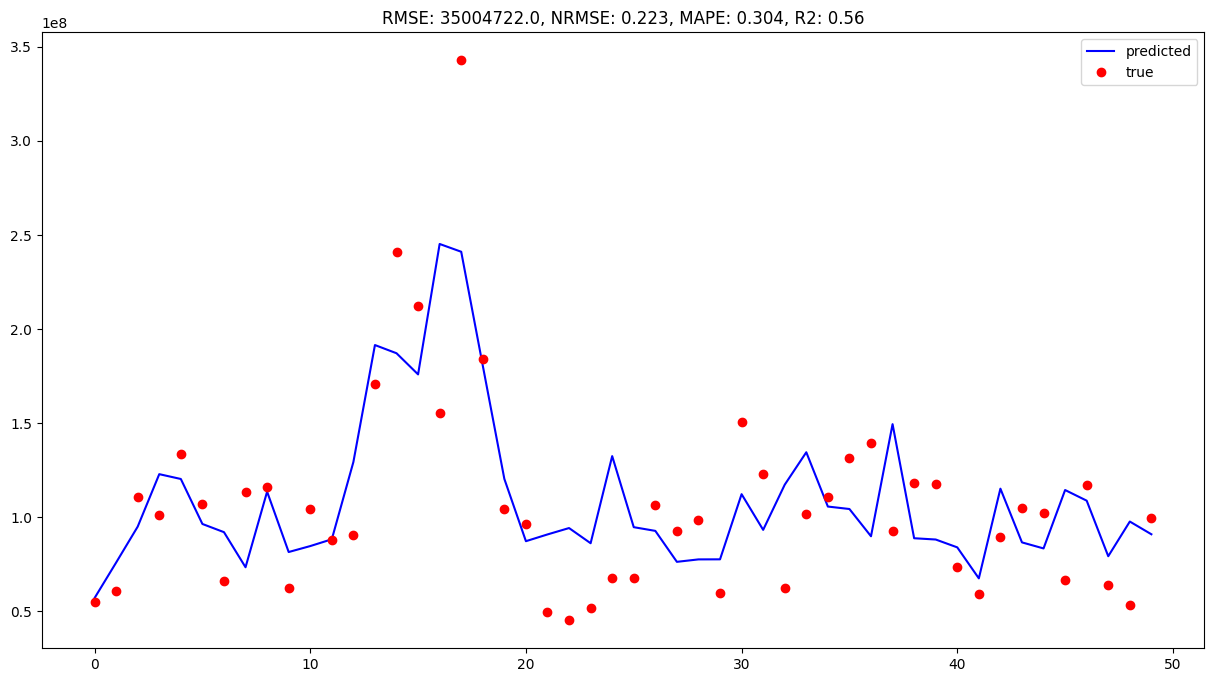

In [19]:
"""
Accuracy Diagnostics

RMSE, NRMSE, MAPE, R2
"""

rmse_metric = mean_squared_error(y_true = result["y_true_interval"], y_pred = result["prediction_interval"], squared=False)
mape_metric = mean_absolute_percentage_error(y_true = result["y_true_interval"], y_pred = result["prediction_interval"])
nrmse_metric = nrmse(result["y_true_interval"], result["prediction_interval"])
r2_metric = r2_score(y_true = result["y_true_interval"], y_pred = result["prediction_interval"])

print(f'RMSE: {rmse_metric}')
print(f'MAPE: {mape_metric}')
print(f'NRMSE: {nrmse_metric}')
print(f'R2: {r2_metric}')


fig, ax = plt.subplots(figsize = (15, 8))
_ = ax.plot(result["prediction_interval"], color = "blue", label = "predicted")
_ = ax.plot(result["y_true_interval"], 'ro', label = "true")
_ = plt.title(f"RMSE: {np.round(rmse_metric)}, NRMSE: {np.round(nrmse_metric, 3)}, MAPE: {np.round(mape_metric, 3)}, R2: {np.round(r2_metric,3)}")
_ = ax.legend()

## 6.Feature Importance and Diminishing returns

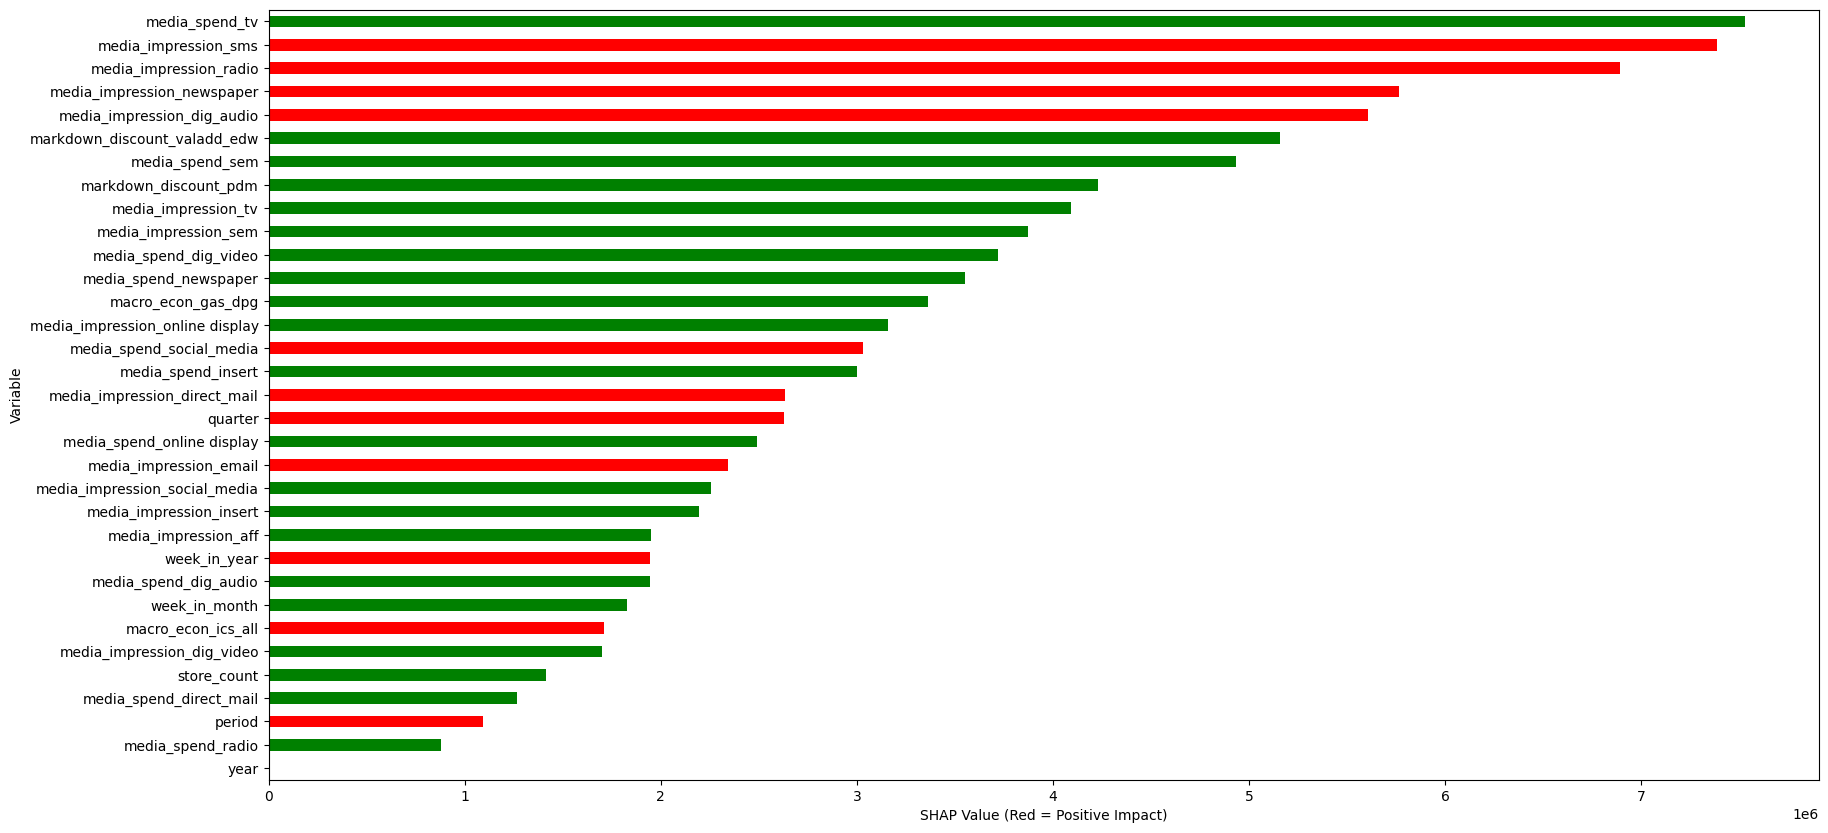

In [20]:
shap_feature_importance(result["df_shap_values"], result["x_input_interval_transformed"])

### 6. Spend vs Effect Share

Below analysis is for last 52 weeks of the data

In [21]:


def plot_spend_vs_effect_share(decomp_spend: pd.DataFrame, figure_size = (15, 10)):
    """Spend vs Effect Share plot

    Use ggplot R funtctionality for this visual via plotline python library.

    Plot of share of spend (sum of media spend) vs share of effect (sum of shapley values).

    Input:
        decomp_spend:
        media         spend_share effect_share
        tv_S           0.31        0.44
        ooh_S          0.23        0.34
    
    """
    
    plot_spend_effect_share = decomp_spend.melt(id_vars = ["media"], value_vars = ["spend_share", "effect_share"])

    plt = ggplot(plot_spend_effect_share, aes("media", "value", fill = "variable")) \
    + geom_bar(stat = "identity", position = "dodge") \
    + geom_text(aes(label = "value * 100", group = "variable"), color = "darkblue", position=position_dodge(width = 0.5), format_string = "{:.2f}%") \
    + coord_flip() \
    + ggtitle("Share of Spend VS Share of Effect") + ylab("") + xlab("") \
    + theme(figure_size = figure_size, 
                    legend_direction='vertical', 
                    legend_title=element_blank(),
                    legend_key_size=20, 
                    legend_entry_spacing_y=5) 
    return plt

DECOMP.RSSD: 0.38774432911420836


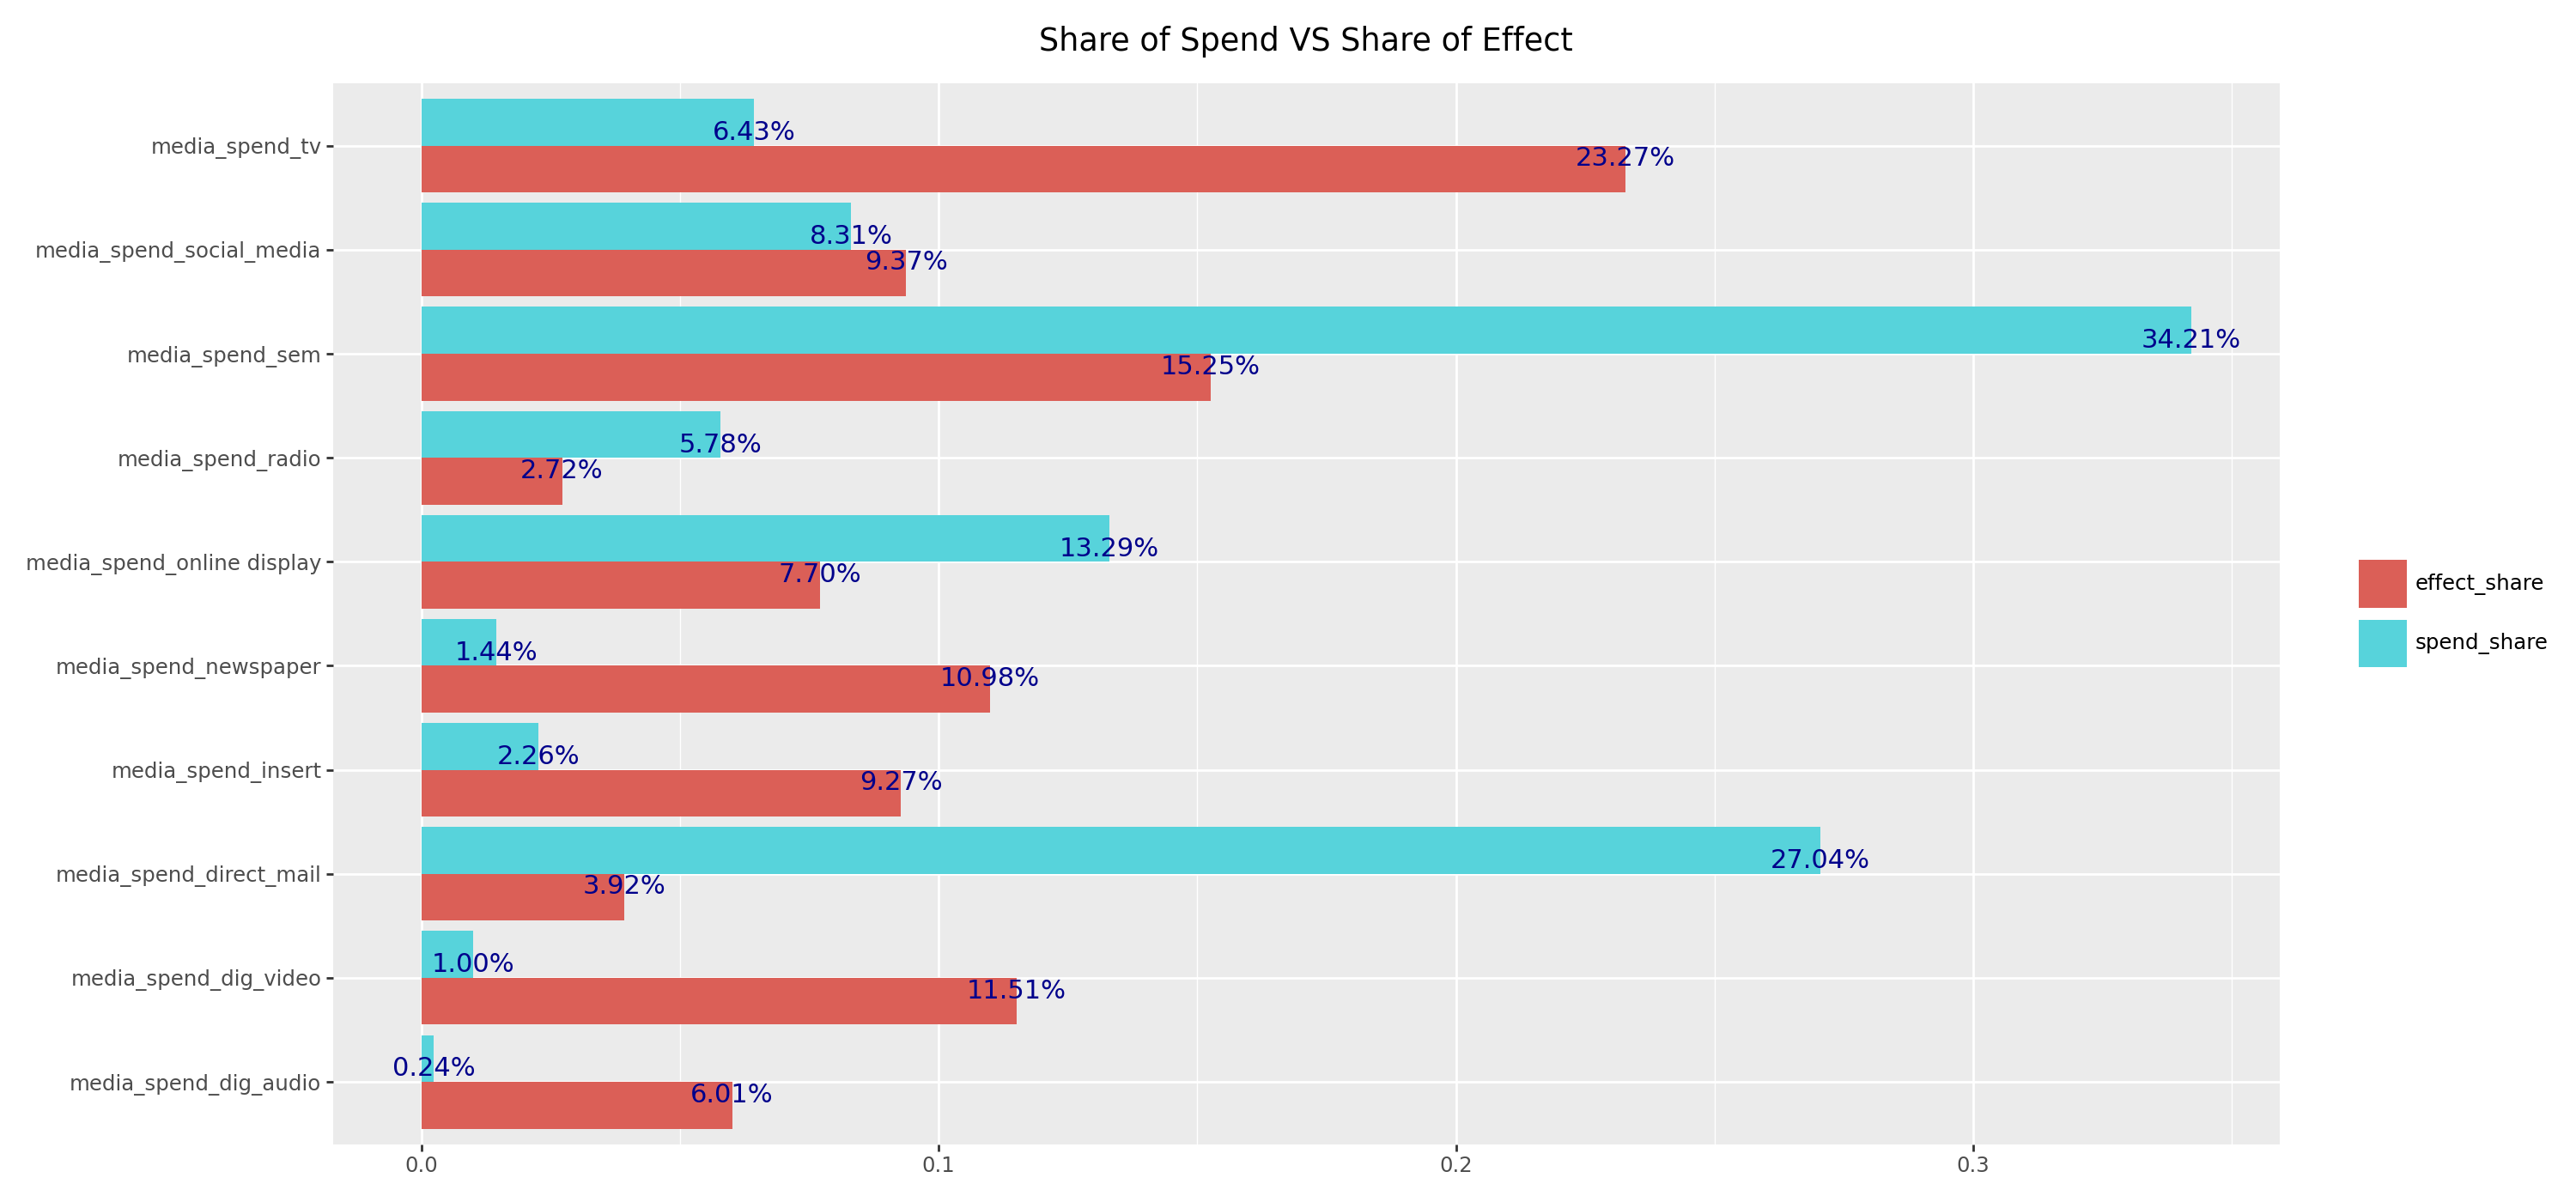

In [22]:
spend_effect_share = calculate_spend_effect_share(df_shap_values = result["df_shap_values"], media_channels = media_spend_cols, df_original = result["x_input_interval_nontransformed"])

decomp_rssd = rssd(effect_share = spend_effect_share.effect_share.values, spend_share = spend_effect_share.spend_share.values)
print(f"DECOMP.RSSD: {decomp_rssd}")
print(plot_spend_vs_effect_share(spend_effect_share, figure_size = (15, 7)))

## 7.Diminishing Returns

In [23]:
def plot_shap_vs_spend(df_shap_values, x_input_interval_nontransformed, x_input_interval_transformed, features, media_channels, figsize=(25, 10)):
    for channel in media_channels:
    
        #index = features.index(channel)

        mean_spend = x_input_interval_nontransformed.loc[x_input_interval_nontransformed[channel] > 0, channel].mean()

        fig, ax = plt.subplots(figsize=figsize)
        sns.regplot(x = x_input_interval_transformed[channel], y = df_shap_values[channel], label = channel,
                    scatter_kws={'alpha': 0.65}, line_kws={'color': 'C2', 'linewidth': 6},
                    lowess=True, ax=ax).set(title=f'{channel}: Spend vs Shapley')
        ax.axhline(0, linestyle = "--", color = "black", alpha = 0.5)
        ax.axvline(mean_spend, linestyle = "--", color = "red", alpha = 0.5, label=f"Average Spend: {int(mean_spend)}")
        ax.set_xlabel(f"{channel} spend")
        ax.set_ylabel(f'SHAP Value for {channel}')
        plt.legend()

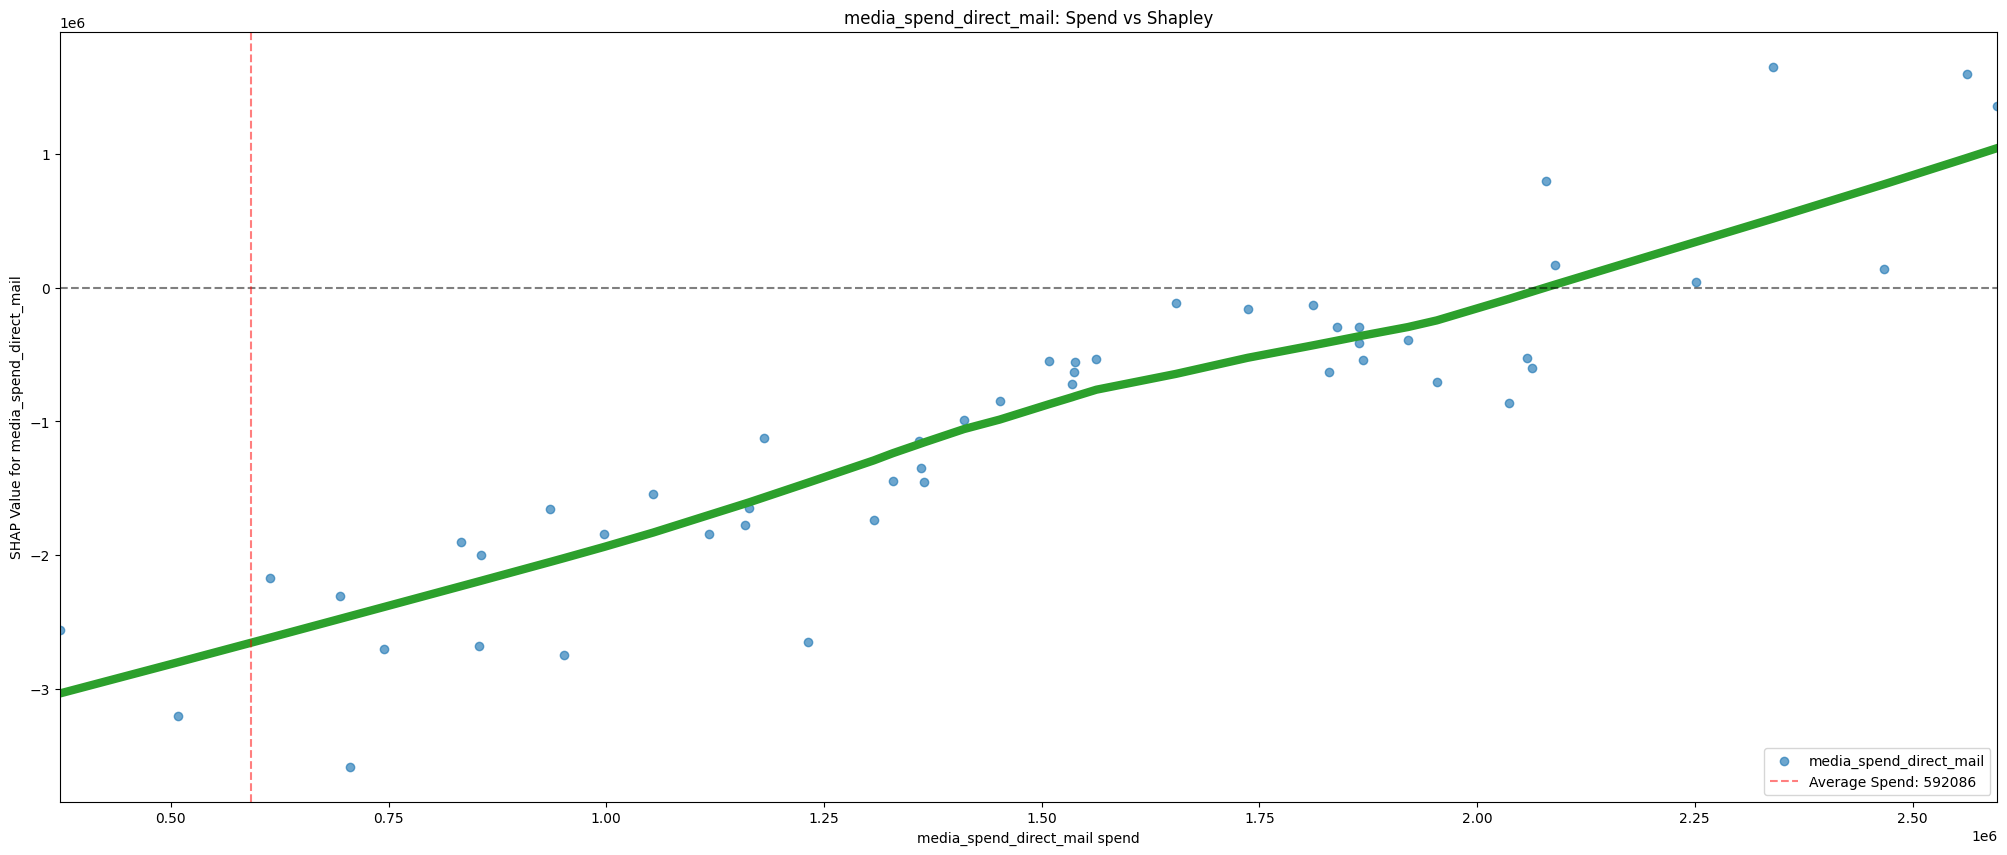

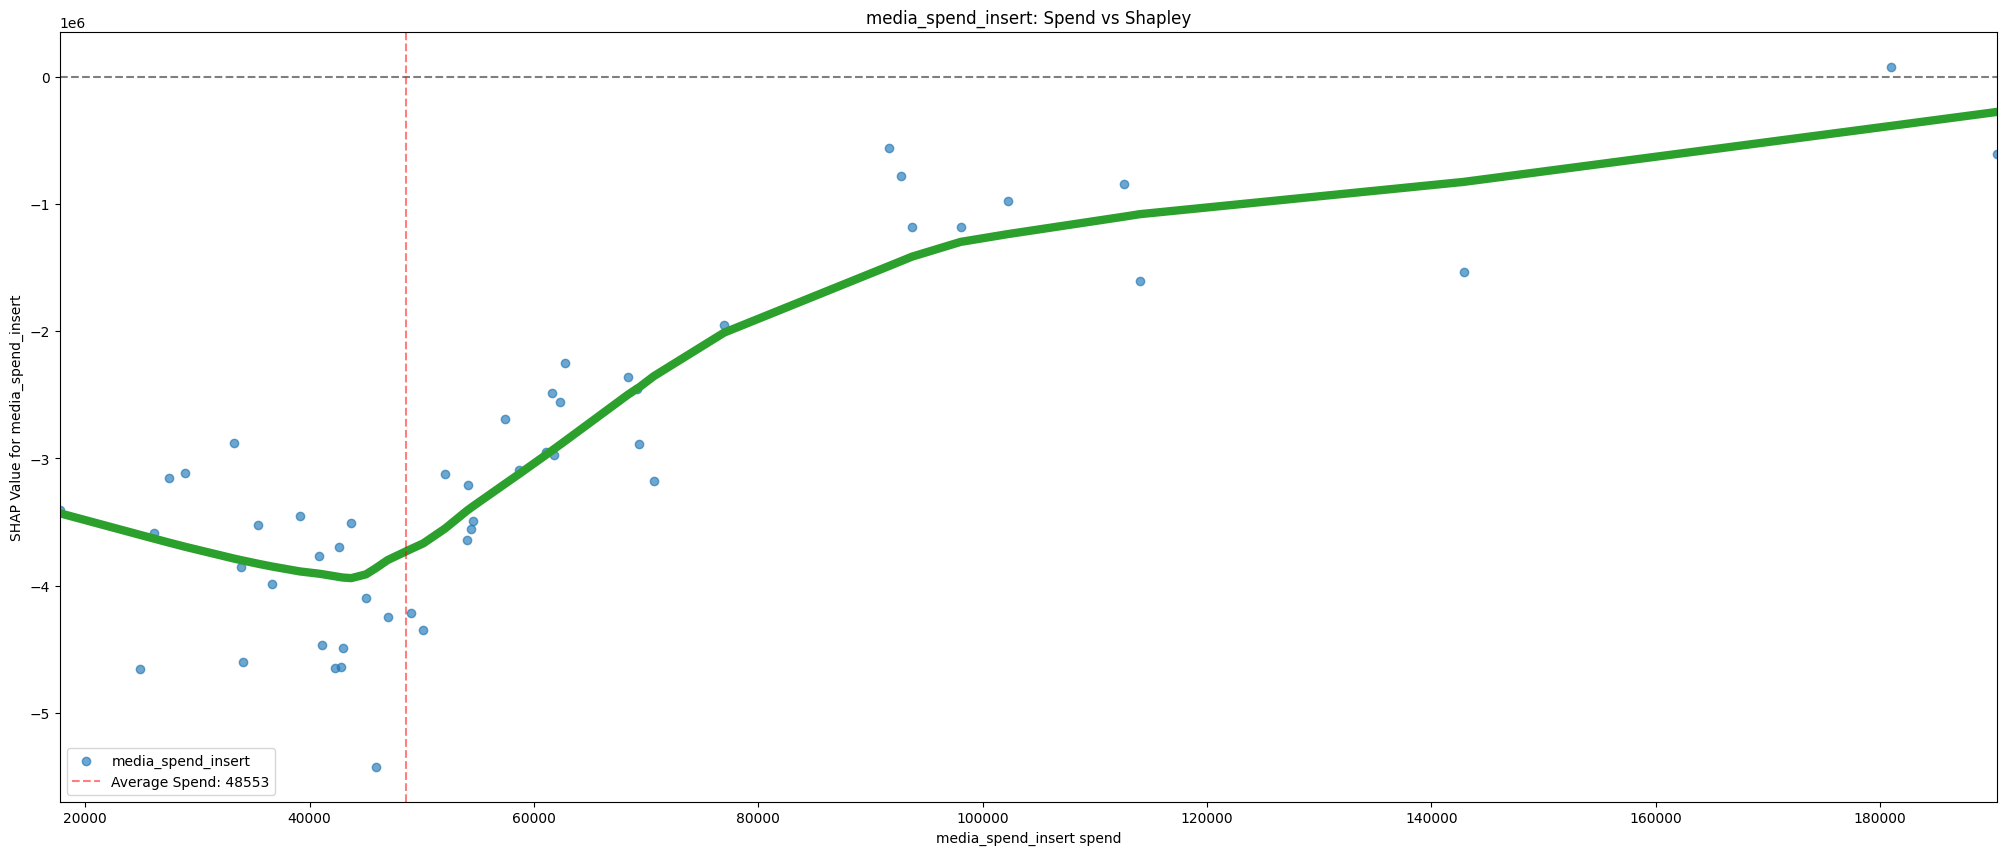

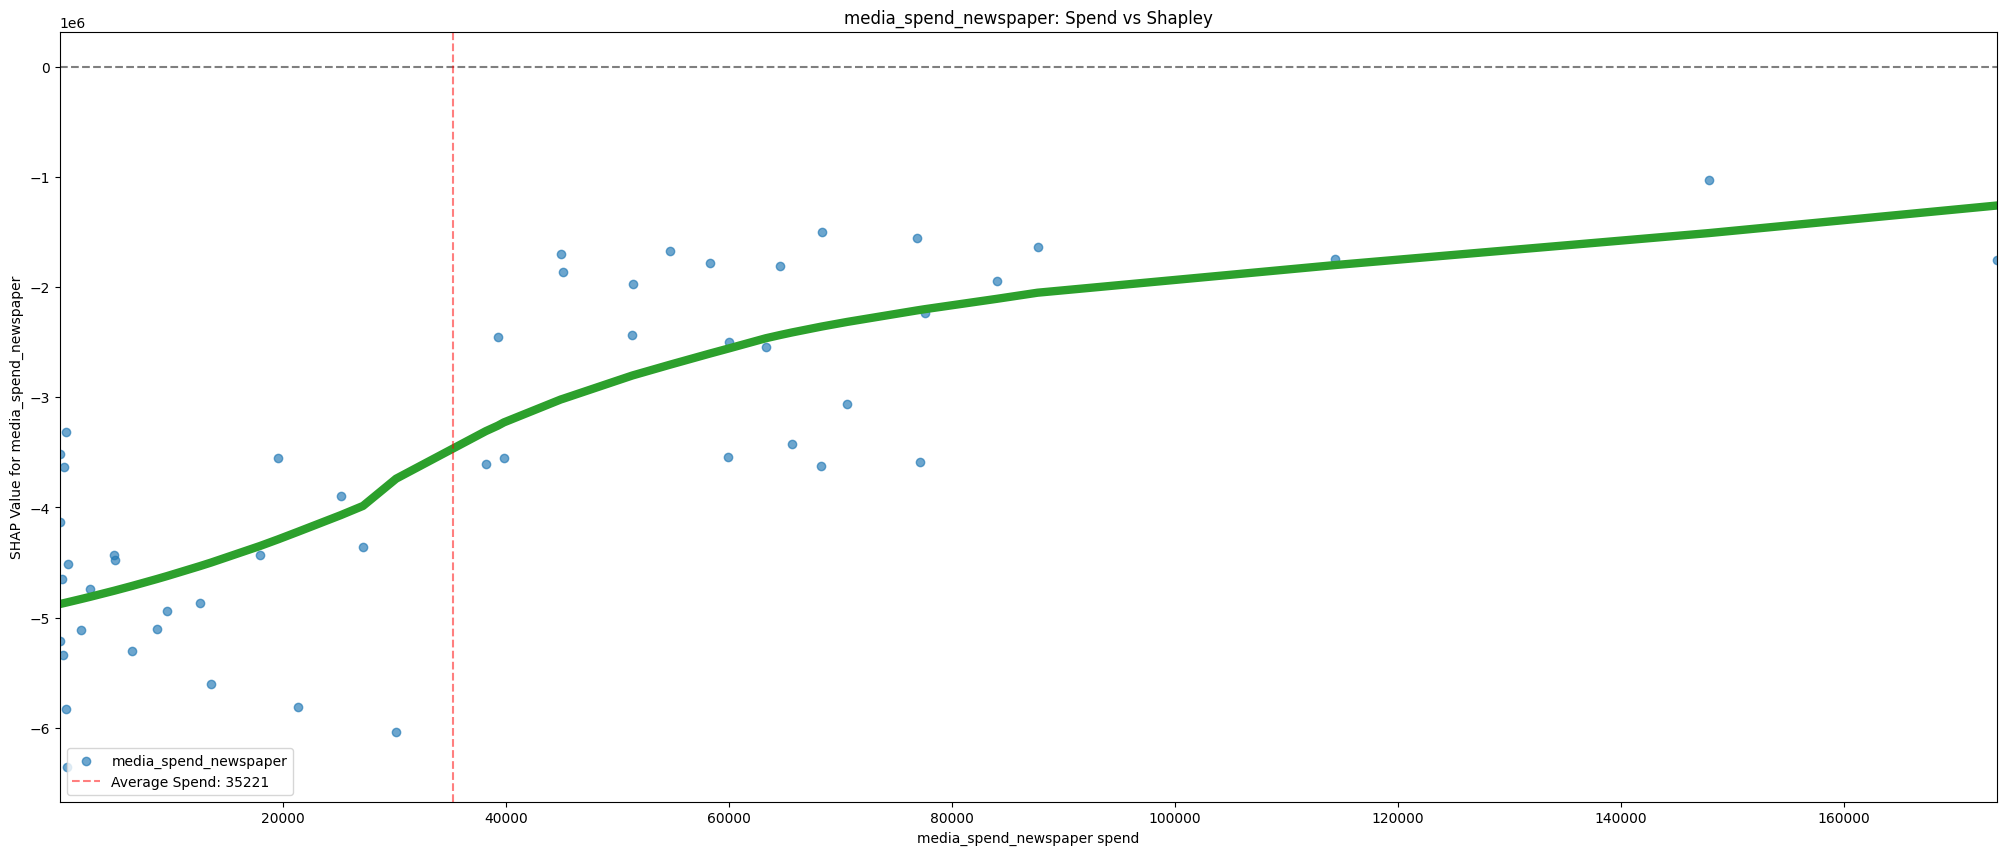

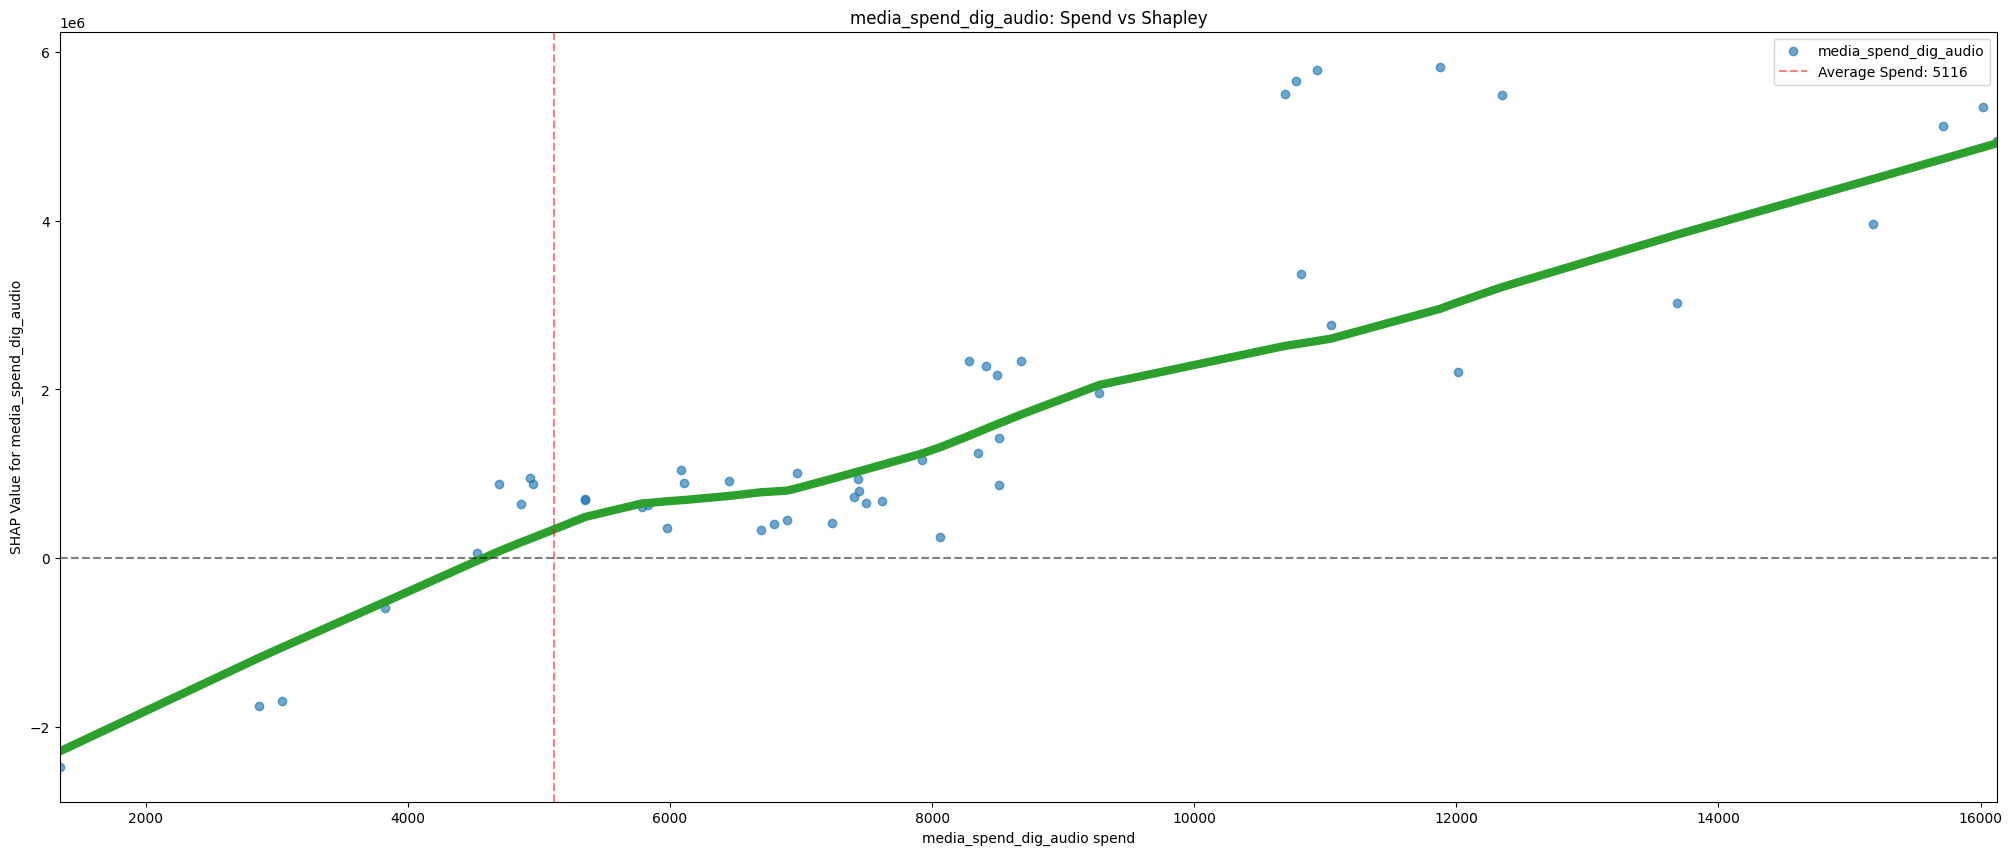

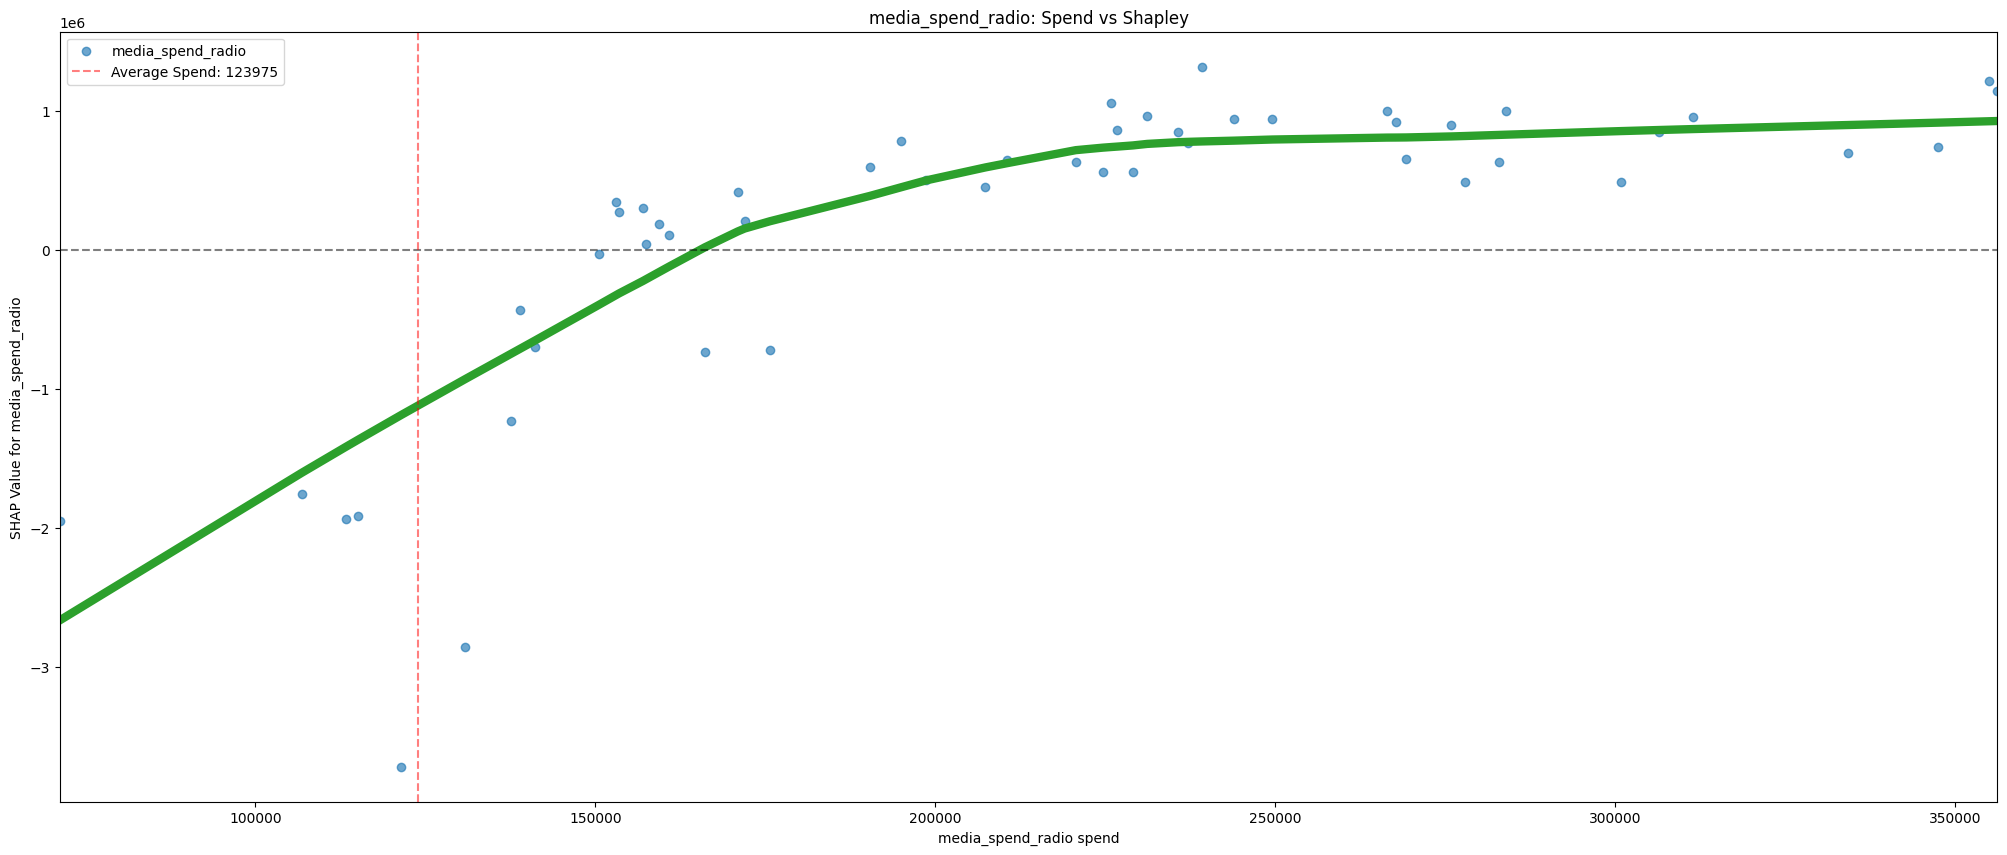

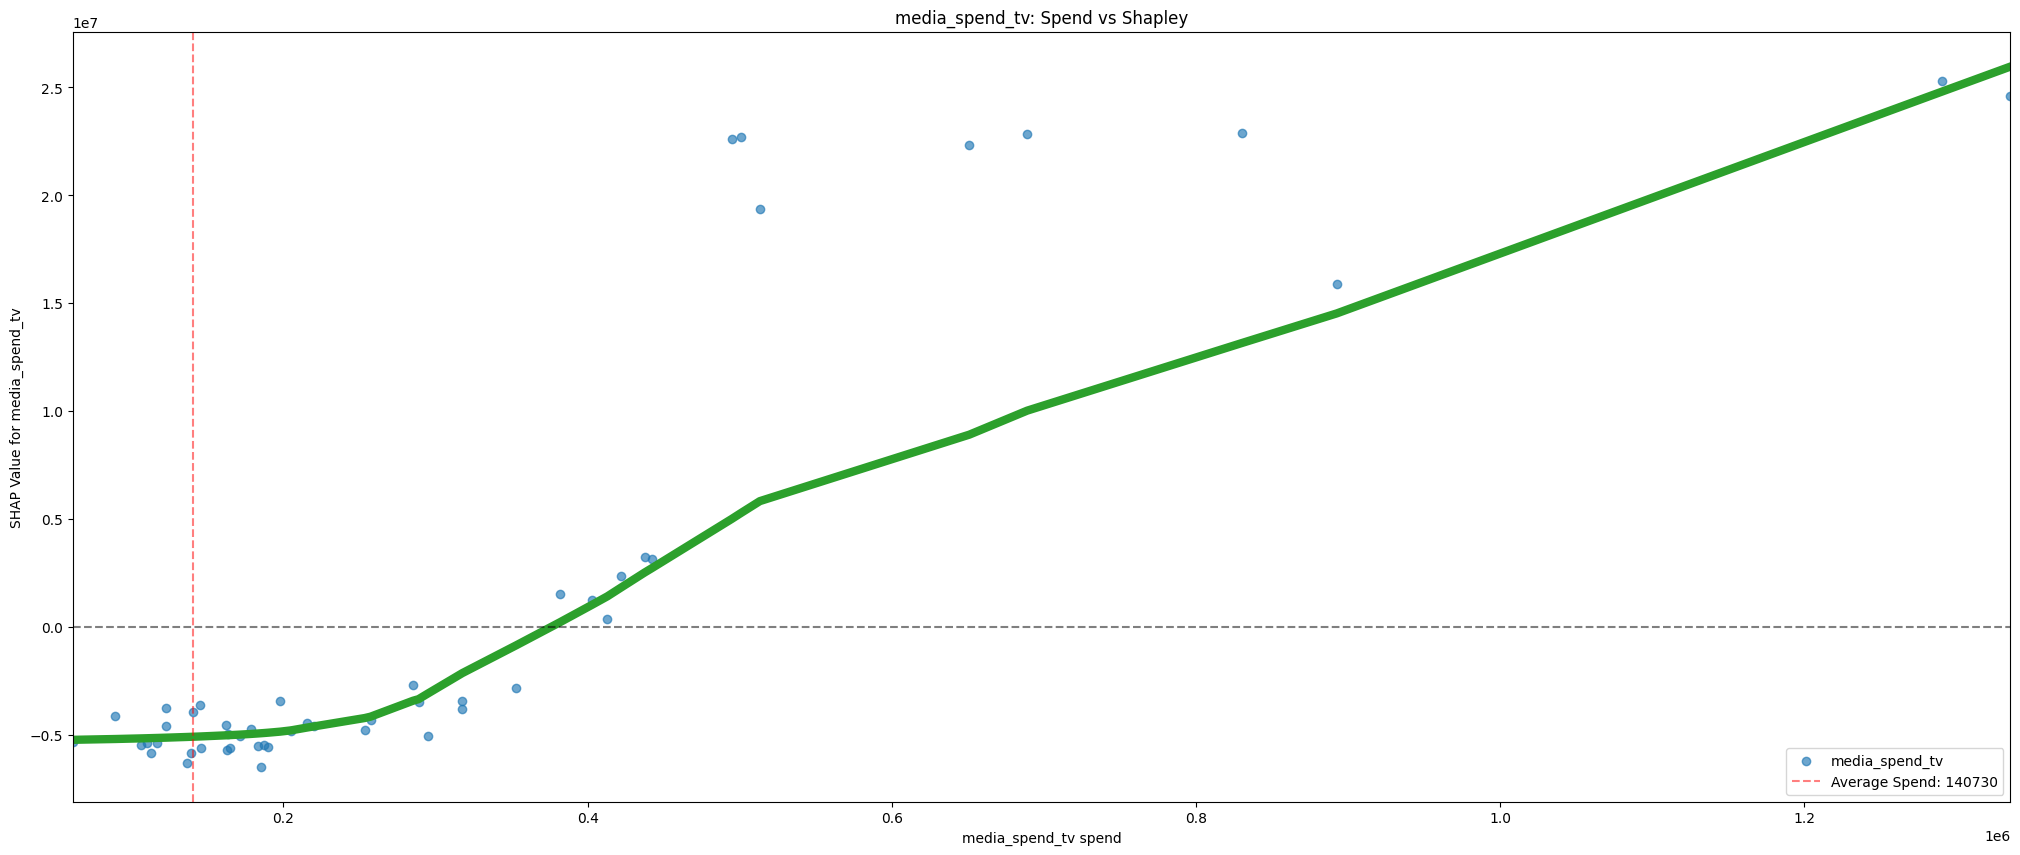

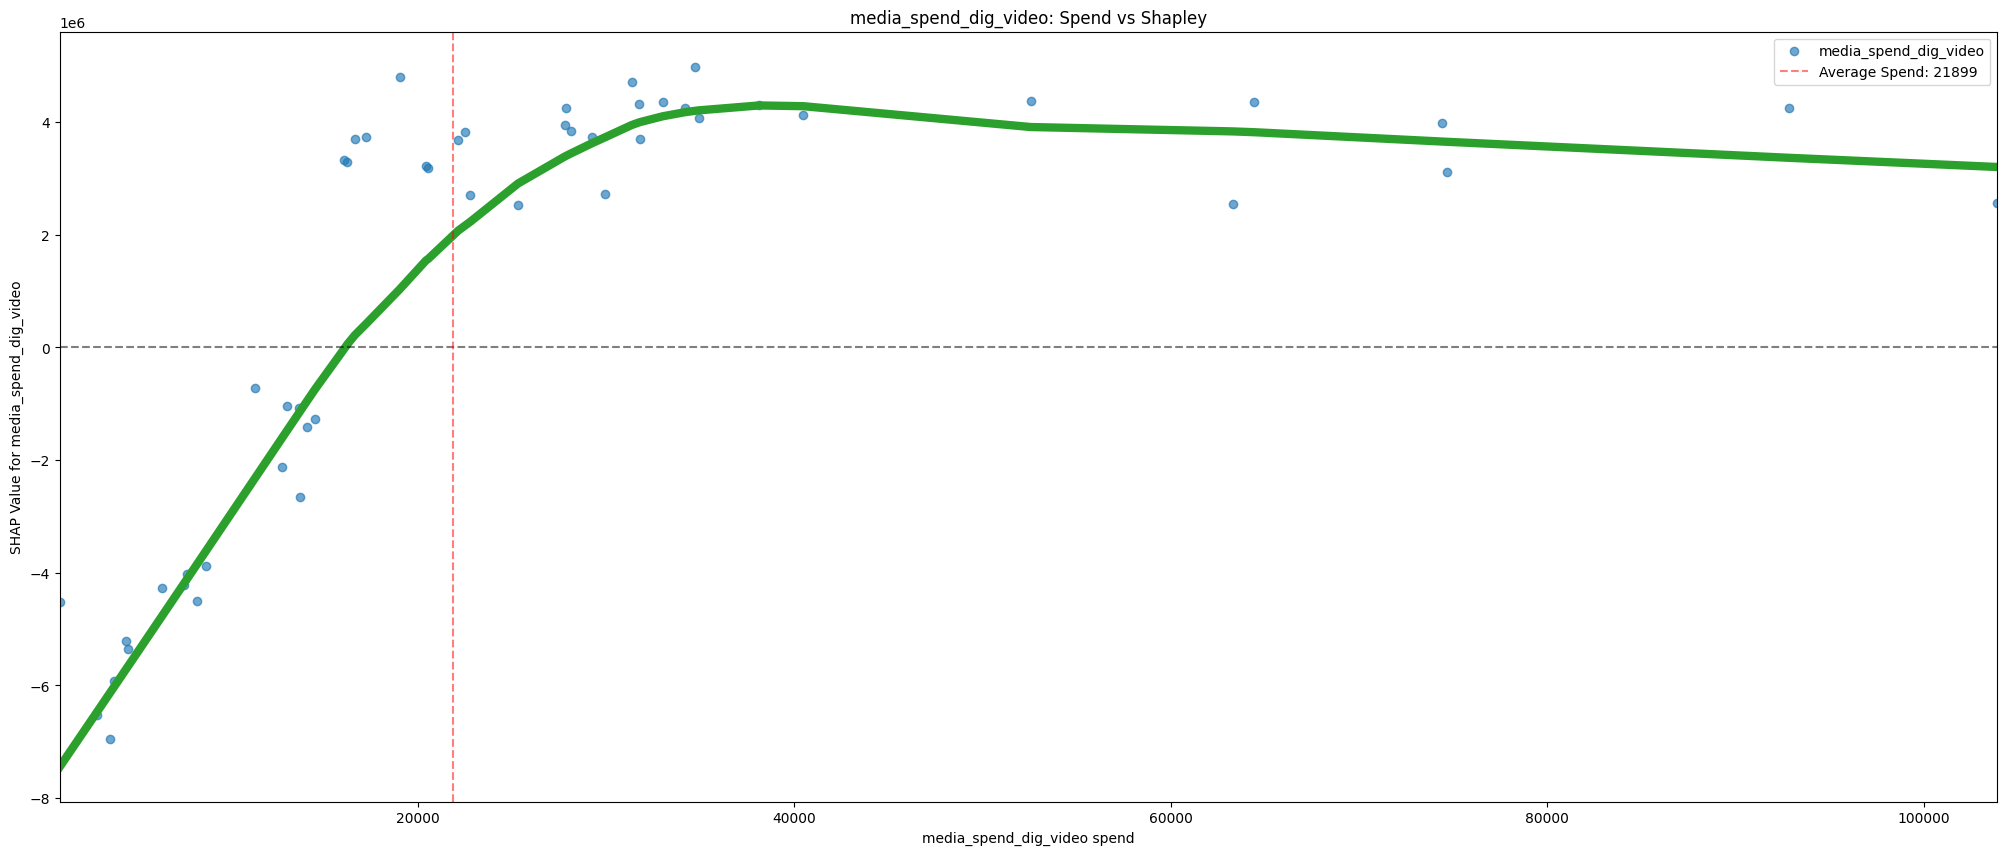

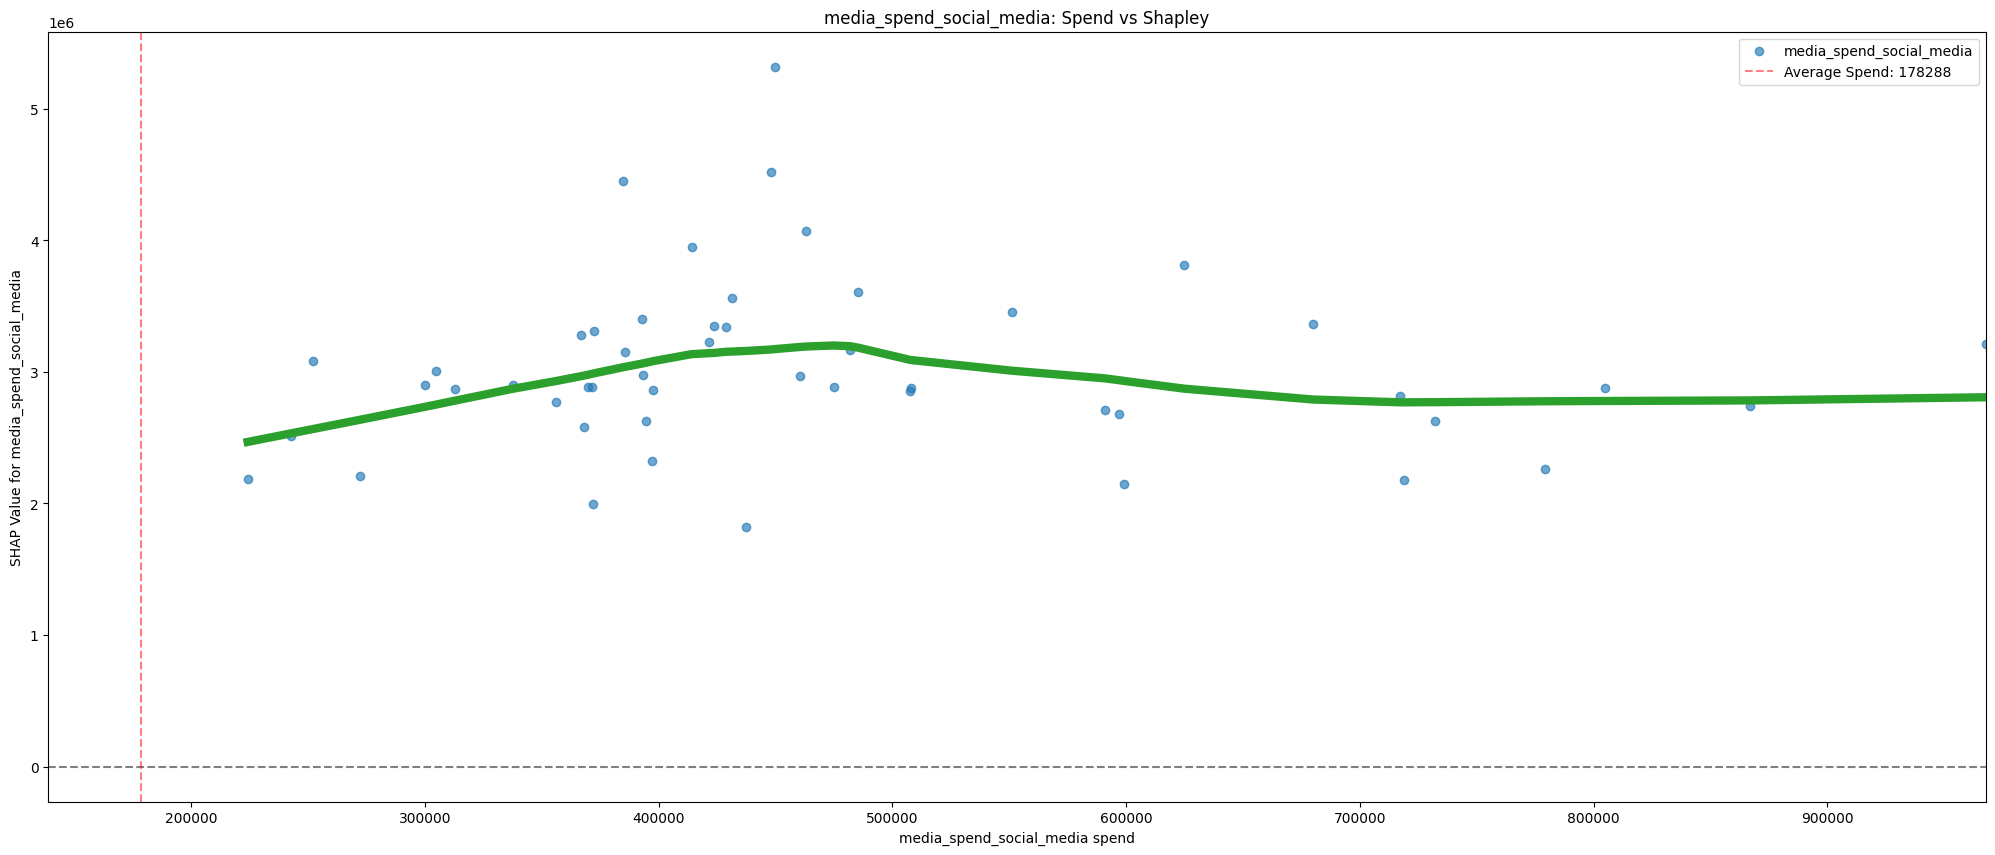

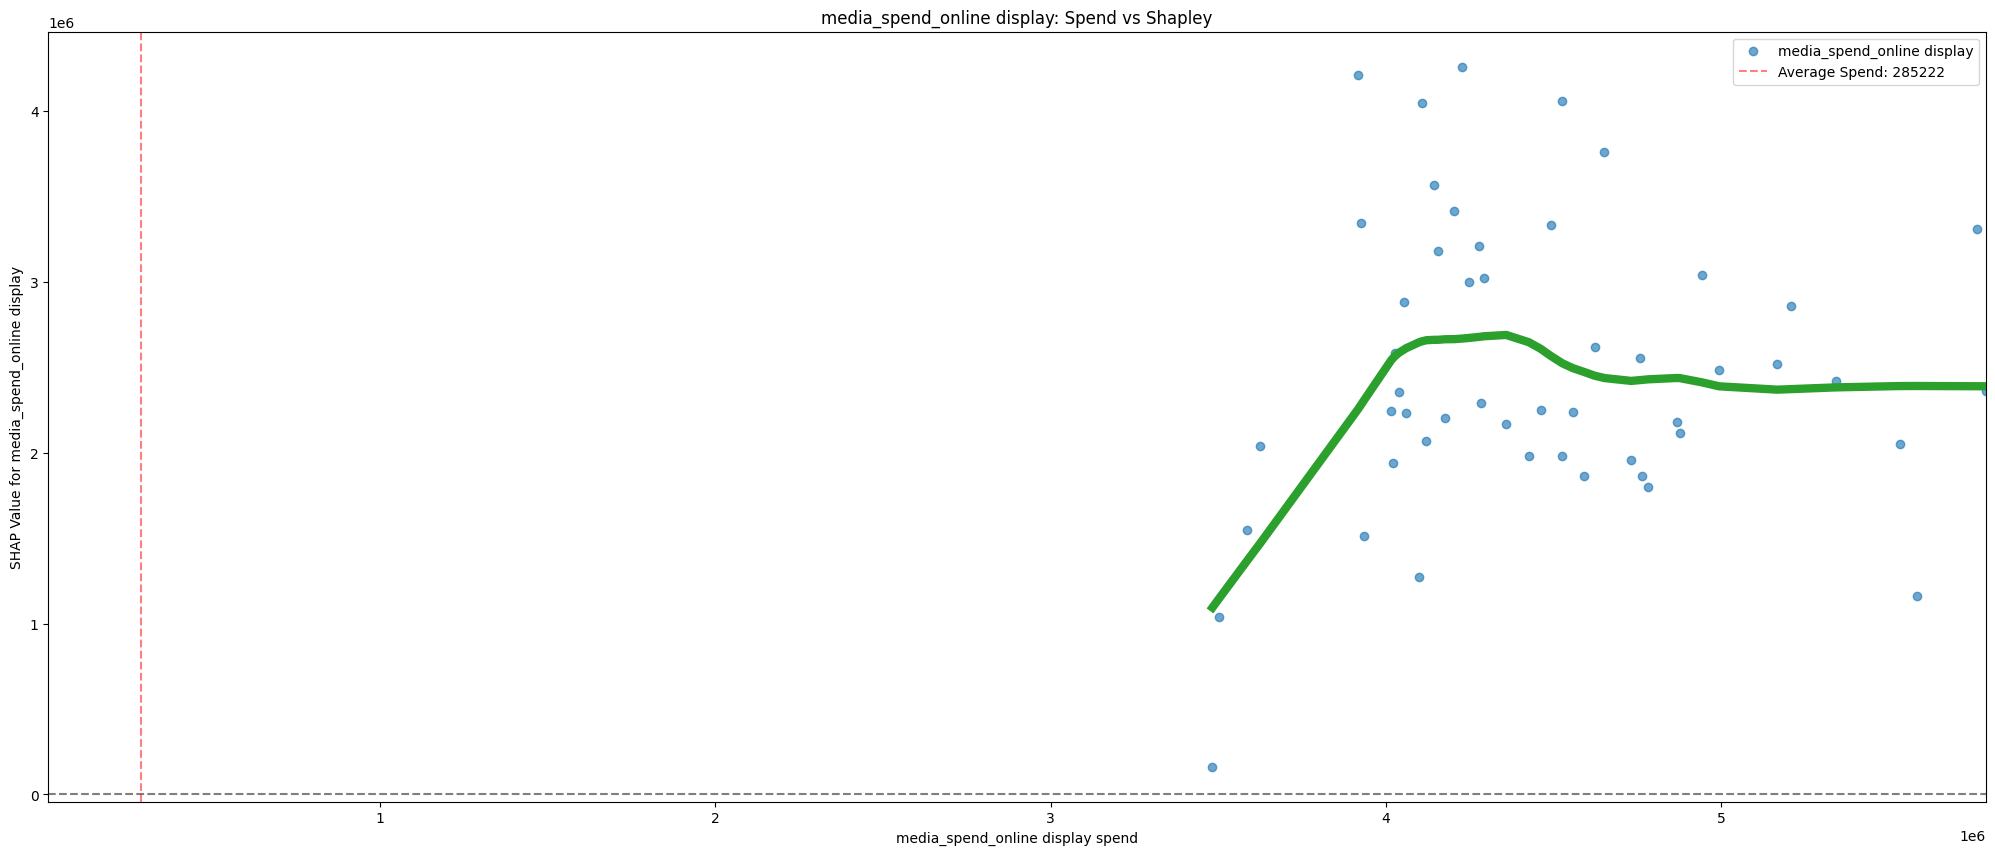

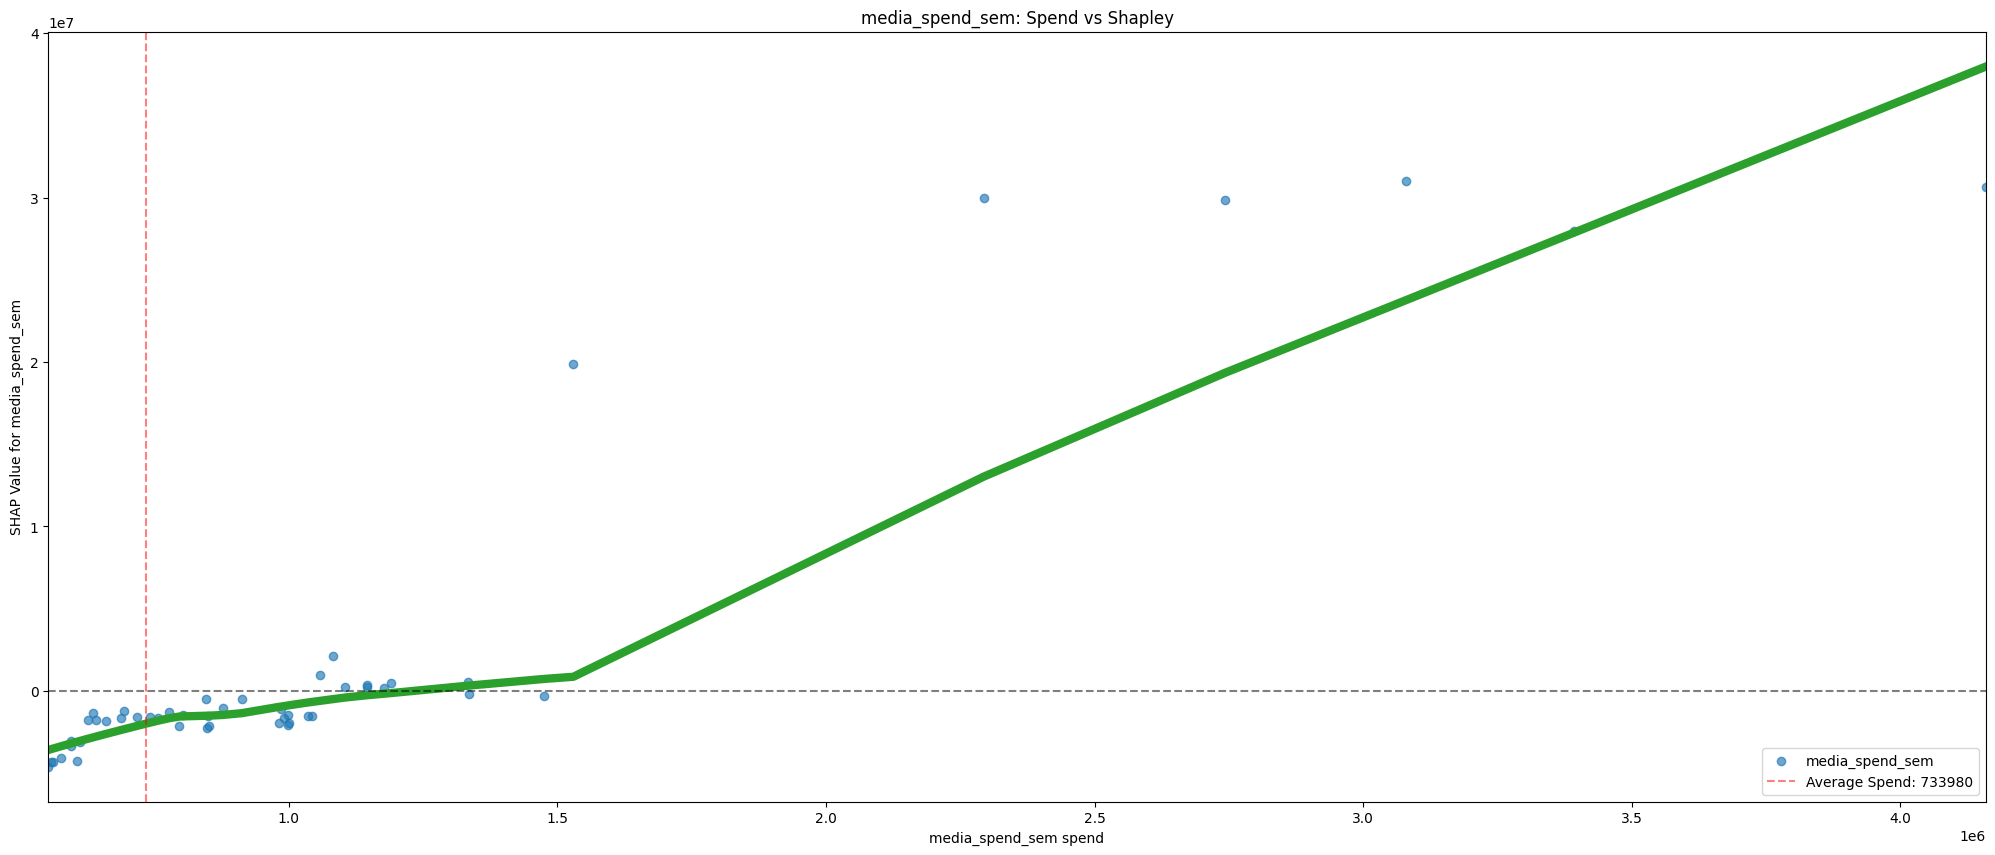

In [24]:
plot_shap_vs_spend(df_shap_values = result["df_shap_values"],\
                   x_input_interval_nontransformed =  result["x_input_interval_nontransformed"],\
                   x_input_interval_transformed = result["x_input_interval_transformed"],
                features = independant_columns,
                 media_channels= media_spend_cols)

## 8.Budget Optimization

In [25]:
"""

Optimize Budget with a +-20% Upper and Lower bound limit

"""


optimization_period = result["x_input_interval_transformed"].shape[0]
print(f"optimization period: {optimization_period}")


#Define Upper and Lower Bound for Optimization
optimization_percentage = 0.2


media_channel_average_spend = result["x_input_interval_transformed"][media_spend_cols].mean(axis=0).values


lower_bound = media_channel_average_spend * np.ones(len(media_spend_cols))*(1-optimization_percentage)
upper_bound = media_channel_average_spend * np.ones(len(media_spend_cols))*(1+optimization_percentage)

boundaries = optimize.Bounds(lb=lower_bound, ub=upper_bound)


print(boundaries.lb.shape)
print(f"lower bound : {boundaries.lb}")
print(f"media_channel_average_spend: {media_channel_average_spend}")
print(f"Upper bound : {boundaries.ub}")

print(f"total budget: {np.sum(media_channel_average_spend)}")


#Inital weights for function
np.random.seed(42)
initial_weights_for_budget = np.array([np.random.uniform(x[0], x[1]) for x in [(lower_bound[i], upper_bound[i]) for i in range(len(lower_bound))]])
print(f"initial_weights_for_budget : {initial_weights_for_budget}")


optimization period: 50
(10,)
lower bound : [1186073.1696522    50231.5755489    31896.87156914    6490.87267293
  170462.64292117  259258.33491877   21627.67007474  378158.45945472
 3565954.09470911  890253.84368022]
media_channel_average_spend: [1482591.46206525   62789.46943612   39871.08946143    8113.59084116
  213078.30365147  324072.91864846   27034.58759343  472698.0743184
 4457442.61838639 1112817.30460028]
Upper bound : [1779109.7544783    75347.36332334   47845.30735371    9736.30900939
  255693.96438176  388887.50237816   32441.50511211  567237.68918208
 5348931.14206366 1335380.76552033]
total budget: 8200509.419002381
initial_weights_for_budget : [1408189.1626138    74109.51430282   43571.02994482    8433.78067068
  183760.31781857  279479.77471818   22255.7766751   541934.37790606
 4637728.36346751 1205436.01067397]


### Using Scipy - Optimize to optimize budget. Goal is to maximize sales by re-allocating the same budget.

In [31]:
def model_based_objective_function(modelz, 
                                   optimization_period: int, 
                                   model_features : list, 
                                   additional_inputs: pd.DataFrame, 
                                   media_channels: list,
                                   media_inputs 
                                   ):

    """
    
    This functions predicts sales for each combination of Budget entered. Negative sales is what we want to minimize.

    modelz: Best performing model for prediction
    optimization_period: Number of optimization periods = length of dataset
    model_features: Final columns to be passed through the model
    additional_input: Non-media spend features in the model = model_features-media_channels
    media_channels: media spend columns
    media_inputs: values of media spend to be plugged in by the optimzer- we do not define this ourselves when we paertially initialize the function (using functools partial)

    """
    
    # print("START OF OBJECTIVE FUNCTION ------>")

    # print(f"media_inputs ==> : {media_inputs}")
    # media_channel_period_average_spend = np.round(media_inputs/optimization_period,decimals=3)
    media_channel_period_average_spend = media_inputs
    # print(f"media_channel_period_average_spend: {media_channel_period_average_spend}")
    
    transformed_media_spends = []
    # for index, media_channel in enumerate(media_channels):
    #     media_period_spend_average = media_channel_period_average_spend[index]
    #     transformed_media_spends.append(media_period_spend_average)

    
    transformed_media_spends = media_channel_period_average_spend    
    # print(f"transformed_media_spends: {transformed_media_spends}")


    #replicate average perio spends into all optimization period
    replicated_media_spends = np.tile(transformed_media_spends, optimization_period).reshape((-1, len(transformed_media_spends)))
    # print(f"replicated_media_spends: {replicated_media_spends}")
    
    #add _hill to the media channels
    media_channels_df = pd.DataFrame(replicated_media_spends, columns = media_channels)
    # print(f" media_channels_df.head() ====>: {media_channels_df.head()}")    
    #additional_data = result["model_train_data"][control_features + [organic_channel+"_hill" for organic_channel in organic_channels]]

    
    #prepare data for predictions
    new_data = pd.concat([additional_inputs.reset_index(drop=True), media_channels_df.reset_index(drop=True)], axis = 1)[model_features]
    # print(f"new_data ====>: {new_data.shape}")
    
    
    #Predict total sales with best performing model
    # print(f"new_data shape : {new_data.shape}, firt row = {new_data[media_channels].iloc[0,:].values}")

    predictions = modelz.predict(X = new_data)


    #Calculate total sales- we need to optimize this
    total_sum = np.sum(predictions)
    # total_sum = np.log10(total_sum)
    # total_sum = total_sum * 1e-10
    # total_sum = np.round(total_sum,3)

    # print(f"total_sum ====>: {total_sum}")
    
    return -1 * total_sum 

In [32]:
"""

Run "Scipy Optimize Minimize" with Lower Bound and Upper Bound and Constraint.

https://stackoverflow.com/questions/76122980/fitting-data-with-scipy-optimize-minimize-with-both-constraints-and-bounds
"""


def budget_constraint(media_spend, budget): 
  """
  
  This constraint ensures that budget is not exceeded.

  """

  return np.sum(media_spend) - budget


"""

Run Optimizer

"""

partial_model_objective_function = partial(model_based_objective_function, 
                                           result["model"], 
                                           optimization_period, 
                                            result["model_features"], 
                                            result["x_input_interval_transformed"][[col for col in result["x_input_interval_transformed"].columns if col not in media_spend_cols]],  
                                            media_spend_cols)

                                            
max_iterations = 500
solver_func_tolerance = 1.0e-6

model_based_optimization_solution = optimize.minimize(
      fun = partial_model_objective_function,
      x0=np.round(initial_weights_for_budget,decimals=3),
      bounds=boundaries,
      method="trust-constr",
      options={
      "maxiter": 2000
      },
      constraints=({
          "type": "eq",
          "fun": lambda x: np.sum(np.round(x,decimals=3)) - np.sum(np.round(media_channel_average_spend,decimals=3))
      })
      )

df = pd.DataFrame({'spend': media_spend_cols, 'previous_spend': media_channel_average_spend, 'optimized_spend': model_based_optimization_solution.x})





In [34]:
"""
Optimizer Output

"""

model_based_optimization_solution

           message: `gtol` termination condition is satisfied.
           success: True
            status: 1
               fun: -5221047808.0
                 x: [ 1.374e+06  5.023e+04  3.675e+04  6.945e+03  1.705e+05
                      2.593e+05  2.163e+04  5.080e+05  4.603e+06  1.171e+06]
               nit: 313
              nfev: 2827
              njev: 257
              nhev: 0
          cg_niter: 618
      cg_stop_cond: 0
              grad: [ 0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00
                      0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00]
   lagrangian_grad: [-6.637e-12 -3.706e-17 -1.481e-10 -2.358e-09 -6.019e-16
                     -1.411e-17 -3.461e-16  8.543e-12 -2.586e-12  5.661e-14]
            constr: [array([ 0.000e+00]), array([ 1.374e+06,  5.023e+04,  3.675e+04,  6.945e+03,
                            1.705e+05,  2.593e+05,  2.163e+04,  5.080e+05,
                            4.603e+06,  1.171e+06])]
               jac: [array([[ 9

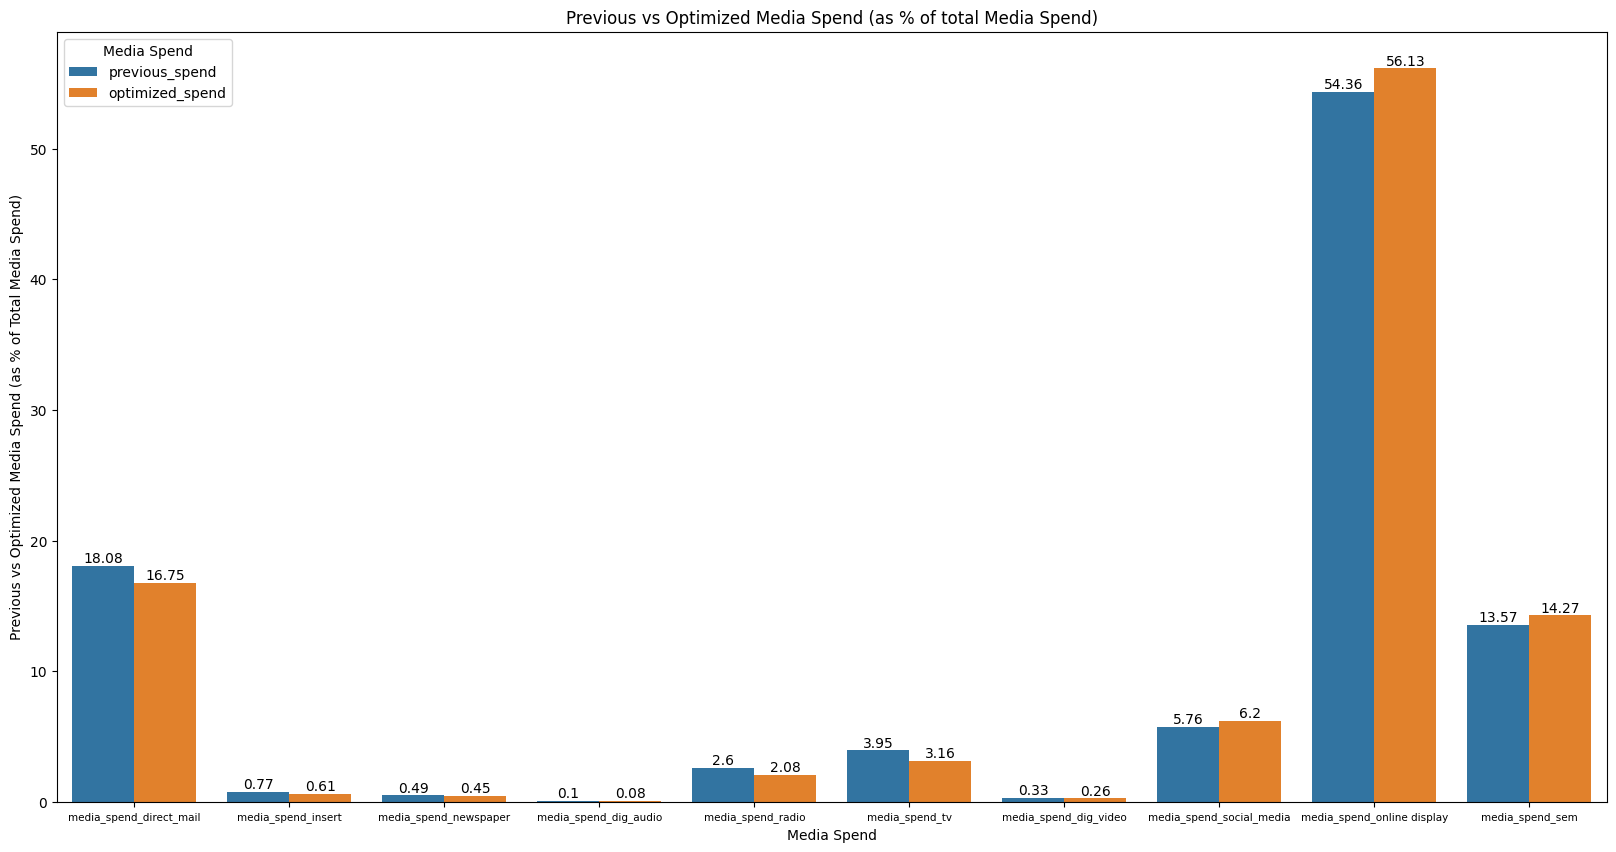

In [33]:
"""

Plot Improved Budget

"""
fig, ax = plt.subplots(figsize=(20, 10))
tidy = df.melt(id_vars='spend').rename(columns=str.title)
tidy['Percentage_Contribution'] = round((tidy['Value'] / tidy.groupby('Variable')['Value'].transform(sum)) * 100, 2)

sns.barplot(x='Spend', y='Percentage_Contribution', hue='Variable', data=tidy, ax=ax)
ax.set_xlabel('Media Spend')
ax.set_ylabel('Previous vs Optimized Media Spend (as % of Total Media Spend)')
ax.set_title('Previous vs Optimized Media Spend (as % of total Media Spend)')
ax.set_xticklabels(ax.get_xticklabels(), fontsize=7.5, rotation=0)
ax.legend(title = 'Media Spend')

for container in ax.containers:
    ax.bar_label(container)
# for container, Percentage_Contribution in zip(ax.containers, tidy.Percentage_Contribution):
#     ax.bar_label(container, labels=[Percentage_Contribution, Percentage_Contribution])

plt.show()

In [35]:
print(f"initial spend for period of {optimization_period} weeks: {media_channel_average_spend}")
print(f"optimized spend for period of {optimization_period} weeks: {model_based_optimization_solution.x}")


print(f"initial average spend: {media_channel_average_spend/optimization_period}")
print(f"optimized average spend: {model_based_optimization_solution.x/optimization_period}")

print(np.array(media_channel_average_spend/optimization_period) - np.array(model_based_optimization_solution.x/optimization_period))




initial spend for period of 50 weeks: [1482591.46206525   62789.46943612   39871.08946143    8113.59084116
  213078.30365147  324072.91864846   27034.58759343  472698.0743184
 4457442.61838639 1112817.30460028]
optimized spend for period of 50 weeks: [1373852.45759397   50231.5755489    36753.94075169    6945.39369739
  170462.64292117  259258.33491877   21627.67007474  508034.20544109
 4602733.09119146 1170610.1060671 ]
initial average spend: [29651.8292413   1255.78938872   797.42178923   162.27181682
  4261.56607303  6481.45837297   540.69175187  9453.96148637
 89148.85236773 22256.34609201]
optimized average spend: [27477.04915188  1004.63151098   735.07881503   138.90787395
  3409.25285842  5185.16669838   432.55340149 10160.68410882
 92054.66182383 23412.20212134]
[ 2174.78008943   251.15787774    62.34297419    23.36394288
   852.31321461  1296.29167459   108.13835037  -706.72262245
 -2905.8094561  -1155.85602934]
